In [1]:
import datetime
import os
import time
import sys
import pandas as pd
import numpy as np

In [2]:
def concattable(): #merge all tables from multiple files
    dflist = []
    dflist2 = []
    yearnow = datetime.datetime.now().year
    year = [i for i in range(yearnow, yearnow-3, -1)]
    num = list(range(1,13))
    for y in year:
        for m in num:
            if m < 10:
                name = f'Data\\{y}0{m}_All_Country_by_statistic_code.csv'
            else:
                name = f'Data\\{y}{m}_All_Country_by_statistic_code.csv'
            path = os.path.join('.',name)
            try:
                dflist.append(pd.read_csv(path))
            except FileNotFoundError:
                pass
    nafter1 = 'Monthly_Quantity'
    nafter2 = 'Monthly_FOB(BAHT)'
    nafter3 = 'Qty_ByMonth_YearAgo_TilNow'
    nafter4 = 'FOB(BAHT)_ByMonth_YearAgo_TilNow'
    for i in dflist:
        a = i.rename(columns={i.columns[8]:nafter1,i.columns[9]:nafter2,i.columns[10]:nafter3,i.columns[11]:nafter4})
        dflist2.append(a)
    df = pd.concat([i for i in dflist2], ignore_index=True)
    return(df)
def savedf(df,name,foldername):
    path = os.path.join('.',f'{foldername}\\')
    df.to_csv(f"{path}{name}.csv",index=False)

In [3]:
#Save file that has all data
#savedf(concattable(),'2020_202207_All_Country_by_statistic_code','Data')

In [4]:
def readfile(name,foldername):
    path = os.path.join('.',f'{foldername}\\')
    try:
        df = pd.read_csv(f"{path}{name}.csv")
    except: return
    return(df)

In [5]:
df_main = readfile('2020_202207_All_Country_by_statistic_code','Data')#.iloc[ : , 1: ]

#add 0 at first digit where len('HS Code') column < 8
df_main['HS Code'] = df_main['HS Code'].astype('string')
m = df_main['HS Code'].str.len()%7 != 0 #Want False
df_main['HS Code'] = df_main['HS Code'].where(m, '0'+df_main['HS Code'])

#Separate HS Code into column
df_main['HS_Code_Chapter'] = df_main['HS Code'].str[:2]
df_main['HS_Code_Heading'] = df_main['HS Code'].str[2:4]
df_main['HS_Code_Sub_Heading(HS_Code)'] = df_main['HS Code'].str[4:6]
df_main['HS_Code_Sub_Heading(Detemines_Duty)'] = df_main['HS Code'].str[6:8]

#add 0 at first 2 digit where len('Statistic Code') column < 3
df_main['Statistic Code'] = df_main['Statistic Code'].astype('string')
m1 = df_main['Statistic Code'].str.len() > 1 #Want False
df_main['Statistic Code'] = df_main['Statistic Code'].where(m1, '00'+df_main['Statistic Code']) #add '00' if len() = 1
m2 = df_main['Statistic Code'].str.len() > 2  #Want False
df_main['Statistic Code'] = df_main['Statistic Code'].where(m2, '0'+df_main['Statistic Code']) #add '0' if len() = 2

display(df_main)


,Year,Month,Type,Country,HS Code,Statistic Code,Unit Code,Description,Monthly_Quantity,Monthly_FOB(BAHT),Qty_ByMonth_YearAgo_TilNow,FOB(BAHT)_ByMonth_YearAgo_TilNow,HS_Code_Chapter,HS_Code_Heading,HS_Code_Sub_Heading(HS_Code),HS_Code_Sub_Heading(Detemines_Duty)
0,2565,1,2,LA,01012100,000,C62,"Horses, pure-bred breeding animals (C62)",139,8674889,139,8674889,01,01,21,00
1,2565,1,2,LA,01012900,000,C62,Other (C62),124,619729,124,619729,01,01,29,00
2,2565,1,2,KH,01022919,000,C62,Other (C62),11519,212083378,11519,212083378,01,02,29,19
3,2565,1,2,LA,01042010,000,C62,"Goats, pure-bred breeding animals (C62)",1826,4614255,1826,4614255,01,04,20,10
4,2565,1,2,LA,01042090,000,C62,Other (C62),480,383832,480,383832,01,04,20,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325627,2563,12,2,AU,97030000,007,C62,Ceramic (C62),25,56578,362,630936,97,03,00,00
325628,2563,12,2,AE,97030000,090,C62,Of other materials (C62),2024,479199,10026,9467360,97,03,00,00
325629,2563,12,2,AE,97040000,000,KGM,"Postage or revenue stamps, stamp-postmarks, fi...",10,18116,673,1431729,97,04,00,00
325630,2563,12,2,US,97050010,001,KGM,Fossil (KGM),0,0,92,100079,97,05,00,10


In [6]:
# get df_HS_Code_Chapter
df_HS_Code_Chapter = readfile('HS_Code_First_2_digits','Data\HS_Code')#.iloc[:,0:2]
df_HS_Code_Chapter = df_HS_Code_Chapter.rename(columns={'HS Code':'HS_Code_Chapter',"Description":"Description_HS_CODE_Chapter"})
display(df_HS_Code_Chapter) #Section is for grouping HS_Code_Chapter
df_HS_Code_Chapter.Description_HS_CODE_Chapter.unique()

,HS_Code_Chapter,Description_HS_CODE_Chapter,Section,Section_Description
0,1,LIVE ANIMAL,1,Live Animals; Animal Products
1,2,MEAT AND EDIBLE MEAT OFFAL,1,Live Animals; Animal Products
2,3,FISH CRUSTACEAN MOLLUSC,1,Live Animals; Animal Products
3,4,DAIRY PRODUCE BIRD EGG HONEY,1,Live Animals; Animal Products
4,5,PRODUCT OF ANIMAL ORIGIN,1,Live Animals; Animal Products
...,...,...,...,...
91,93,ARMS AMMUNITION,19,Arms and Ammunition; Parts and Accessories the...
92,94,"FURNITURE , LAMPS , PREFABRICATED BUILDINGS",20,Miscellaneous Manufactured Articles
93,95,"TOY , SPORTS REQUISITES",20,Miscellaneous Manufactured Articles
94,96,MISCELLANEOUS MANUFACTURED ARTICLES,20,Miscellaneous Manufactured Articles


array(['LIVE ANIMAL', 'MEAT AND EDIBLE MEAT OFFAL',
       'FISH CRUSTACEAN MOLLUSC', 'DAIRY PRODUCE BIRD EGG HONEY',
       'PRODUCT OF ANIMAL ORIGIN', 'LIVE TREE AND OTHER PLANT',
       'EDIBLE VEGETABLE', 'EDIBLE FRUIT AND NUT', 'COFFEE TEA SPICE',
       'CEREAL', 'PRODUCT OF MILLING INDUSTRY',
       'OIL SEED OLEAGINOUS FRUIT',
       'LAC; GUM, RESINS AND OTHER EXTRACTS.',
       'VEGETABLE PLAITING MATERIAL', 'ANIMAL OR VEGETABLE FAT & OIL',
       'PREPARATION OF MEAT FISH', 'SUGAR AND CONFECTIONERY',
       'COCOA AND PREPARATION', 'PREP OF CEREAL FLOUR STARCH',
       'PREP OF VEG FRUIT PLANT', 'MISC EDIBLE PREPARATION',
       'BEVERAGE SPIRIT VINEGAR', 'WASTE FROM FOOD INDUSTRY', 'TOBACCO',
       'SALT SULPHUR EARTH CEMENT', 'ORES, SLAG AND ASH',
       'MINERAL FUEL OIL WAX', 'INORGANIC CHEMICAL', 'ORGANIC CHEMICAL',
       'PHARMACEUTICAL PRODUCT', 'FERTILISER',
       'TANNING DYEING EXTRACT,PAINT', 'ESSENTIAL OIL PERFUMERY',
       'SOAP WASH PREP POLISH CANDLE',
   

In [7]:
# get df_Unit
df_unit = readfile('Unit_RMTS_Customs','Data')
df_unit = df_unit.rename(columns={'Unit_Code ':'Unit_Code'})
#df_unit.Unit_Code.unique()
display(df_unit)
display(df_unit.info())

,Unit_Code,Unit
0,C62,PIECE OR UNIT
1,CMQ,CUBIC CENTIMETRE
2,CMT,CENTIMETRE
3,CTM,METRIC CARAT
4,FTK,SQUARE FOOT
5,FTQ,CUBIC FOOT
6,GRM,GRAM
7,INH,INCH
8,KGM,KILOGRAM
9,KWH,KILOWATT HOUR


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Unit_Code  22 non-null     object
 1   Unit       22 non-null     object
dtypes: object(2)
memory usage: 480.0+ bytes


None

In [8]:
# Merge df_main with df_HS_Code_Chapter
df_main['HS_Code_Chapter'] = df_main['HS_Code_Chapter'].astype('int')
df_main = pd.merge( df_main, df_HS_Code_Chapter, left_on='HS_Code_Chapter', right_on='HS_Code_Chapter', how='left' )
# Merge df_main with df_Unit
df_main = df_main.rename(columns={'Unit Code':'Unit_Code'})
df_main['Unit_Code'] = df_main['Unit_Code'].str.strip()
df_main = pd.merge( df_main, df_unit, left_on='Unit_Code', right_on='Unit_Code', how='left' )
display(df_main)
display(df_main.info())

,Year,Month,Type,Country,HS Code,Statistic Code,Unit_Code,Description,Monthly_Quantity,Monthly_FOB(BAHT),Qty_ByMonth_YearAgo_TilNow,FOB(BAHT)_ByMonth_YearAgo_TilNow,HS_Code_Chapter,HS_Code_Heading,HS_Code_Sub_Heading(HS_Code),HS_Code_Sub_Heading(Detemines_Duty),Description_HS_CODE_Chapter,Section,Section_Description,Unit
0,2565,1,2,LA,01012100,000,C62,"Horses, pure-bred breeding animals (C62)",139,8674889,139,8674889,1,01,21,00,LIVE ANIMAL,1,Live Animals; Animal Products,PIECE OR UNIT
1,2565,1,2,LA,01012900,000,C62,Other (C62),124,619729,124,619729,1,01,29,00,LIVE ANIMAL,1,Live Animals; Animal Products,PIECE OR UNIT
2,2565,1,2,KH,01022919,000,C62,Other (C62),11519,212083378,11519,212083378,1,02,29,19,LIVE ANIMAL,1,Live Animals; Animal Products,PIECE OR UNIT
3,2565,1,2,LA,01042010,000,C62,"Goats, pure-bred breeding animals (C62)",1826,4614255,1826,4614255,1,04,20,10,LIVE ANIMAL,1,Live Animals; Animal Products,PIECE OR UNIT
4,2565,1,2,LA,01042090,000,C62,Other (C62),480,383832,480,383832,1,04,20,90,LIVE ANIMAL,1,Live Animals; Animal Products,PIECE OR UNIT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325627,2563,12,2,AU,97030000,007,C62,Ceramic (C62),25,56578,362,630936,97,03,00,00,WORKS OF ART,21,"Works of art, Collectors' Pieces and Antiques",PIECE OR UNIT
325628,2563,12,2,AE,97030000,090,C62,Of other materials (C62),2024,479199,10026,9467360,97,03,00,00,WORKS OF ART,21,"Works of art, Collectors' Pieces and Antiques",PIECE OR UNIT
325629,2563,12,2,AE,97040000,000,KGM,"Postage or revenue stamps, stamp-postmarks, fi...",10,18116,673,1431729,97,04,00,00,WORKS OF ART,21,"Works of art, Collectors' Pieces and Antiques",KILOGRAM
325630,2563,12,2,US,97050010,001,KGM,Fossil (KGM),0,0,92,100079,97,05,00,10,WORKS OF ART,21,"Works of art, Collectors' Pieces and Antiques",KILOGRAM


<class 'pandas.core.frame.DataFrame'>
Int64Index: 325632 entries, 0 to 325631
Data columns (total 20 columns):
 #   Column                               Non-Null Count   Dtype 
---  ------                               --------------   ----- 
 0   Year                                 325632 non-null  int64 
 1   Month                                325632 non-null  int64 
 2   Type                                 325632 non-null  int64 
 3   Country                              325632 non-null  object
 4   HS Code                              325632 non-null  string
 5   Statistic Code                       325632 non-null  string
 6   Unit_Code                            325632 non-null  object
 7   Description                          316226 non-null  object
 8   Monthly_Quantity                     325632 non-null  int64 
 9   Monthly_FOB(BAHT)                    325632 non-null  int64 
 10  Qty_ByMonth_YearAgo_TilNow           325632 non-null  int64 
 11  FOB(BAHT)_ByMonth_YearAgo_

None

In [9]:
#Add date column in df_main
df_main['Year'] = df_main['Year']-543
df_main['Year'] = df_main['Year'].astype('string')
df_main['Month'] = df_main['Month'].astype('string')
m = df_main['Month'].str.len() != 1 #Want False
df_main['Month'] = df_main['Month'].where(m, '0'+df_main['Month']) #add '0' if len() = 1
display(df_main['Month'])

df_main['Date'] = df_main['Month'] + df_main['Year']
df_main['Date'] = pd.to_datetime(df_main['Date'],format='%m%Y')
display(df_main['Date'])

0         01
1         01
2         01
3         01
4         01
          ..
325627    12
325628    12
325629    12
325630    12
325631    12
Name: Month, Length: 325632, dtype: string

0        2022-01-01
1        2022-01-01
2        2022-01-01
3        2022-01-01
4        2022-01-01
            ...    
325627   2020-12-01
325628   2020-12-01
325629   2020-12-01
325630   2020-12-01
325631   2020-12-01
Name: Date, Length: 325632, dtype: datetime64[ns]

In [30]:
display(df_main)
display(df_main.info())

,Year,Month,Type,Country,HS Code,Statistic Code,Unit_Code,Description,Monthly_Quantity,Monthly_FOB(BAHT),...,FOB(BAHT)_ByMonth_YearAgo_TilNow,HS_Code_Chapter,HS_Code_Heading,HS_Code_Sub_Heading(HS_Code),HS_Code_Sub_Heading(Detemines_Duty),Description_HS_CODE_Chapter,Section,Section_Description,Unit,Date
0,2022,01,2,LA,01012100,000,C62,"Horses, pure-bred breeding animals (C62)",139,8674889,...,8674889,1,01,21,00,LIVE ANIMAL,1,Live Animals; Animal Products,PIECE OR UNIT,2022-01-01
1,2022,01,2,LA,01012900,000,C62,Other (C62),124,619729,...,619729,1,01,29,00,LIVE ANIMAL,1,Live Animals; Animal Products,PIECE OR UNIT,2022-01-01
2,2022,01,2,KH,01022919,000,C62,Other (C62),11519,212083378,...,212083378,1,02,29,19,LIVE ANIMAL,1,Live Animals; Animal Products,PIECE OR UNIT,2022-01-01
3,2022,01,2,LA,01042010,000,C62,"Goats, pure-bred breeding animals (C62)",1826,4614255,...,4614255,1,04,20,10,LIVE ANIMAL,1,Live Animals; Animal Products,PIECE OR UNIT,2022-01-01
4,2022,01,2,LA,01042090,000,C62,Other (C62),480,383832,...,383832,1,04,20,90,LIVE ANIMAL,1,Live Animals; Animal Products,PIECE OR UNIT,2022-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325627,2020,12,2,AU,97030000,007,C62,Ceramic (C62),25,56578,...,630936,97,03,00,00,WORKS OF ART,21,"Works of art, Collectors' Pieces and Antiques",PIECE OR UNIT,2020-12-01
325628,2020,12,2,AE,97030000,090,C62,Of other materials (C62),2024,479199,...,9467360,97,03,00,00,WORKS OF ART,21,"Works of art, Collectors' Pieces and Antiques",PIECE OR UNIT,2020-12-01
325629,2020,12,2,AE,97040000,000,KGM,"Postage or revenue stamps, stamp-postmarks, fi...",10,18116,...,1431729,97,04,00,00,WORKS OF ART,21,"Works of art, Collectors' Pieces and Antiques",KILOGRAM,2020-12-01
325630,2020,12,2,US,97050010,001,KGM,Fossil (KGM),0,0,...,100079,97,05,00,10,WORKS OF ART,21,"Works of art, Collectors' Pieces and Antiques",KILOGRAM,2020-12-01


<class 'pandas.core.frame.DataFrame'>
Int64Index: 325632 entries, 0 to 325631
Data columns (total 21 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   Year                                 325632 non-null  string        
 1   Month                                325632 non-null  string        
 2   Type                                 325632 non-null  int64         
 3   Country                              325632 non-null  object        
 4   HS Code                              325632 non-null  string        
 5   Statistic Code                       325632 non-null  string        
 6   Unit_Code                            325632 non-null  object        
 7   Description                          316226 non-null  object        
 8   Monthly_Quantity                     325632 non-null  int64         
 9   Monthly_FOB(BAHT)                    325632 non-null  int64         
 

None

In [11]:
import matplotlib.pyplot as plt

In [12]:
df_pivot = df_main.pivot_table( index='Date', columns='Section_Description', values='Monthly_FOB(BAHT)', aggfunc='sum' )
display(df_pivot.head())

Section_Description,Animal or Vegetable Fats and Oils and their cleavage products; Prepared Edible Fats; animal or vegatble waxes,Arms and Ammunition; Parts and Accessories thereof,"Articles of Stone, Plaster, Cement, Asbestos, Mica or similar Materials; Ceramic Products; Glass and Glassware",Base Metals and Articles of Base Metal,"Footwear, Headgear, Umbrellas, Sun Umbrellas, Walking-sticks, seat-sticks, whips, Riding-crops and Parts thereof; Prepared Feathers and articles Made therewith; artificial Flowers; Articles of Human Hair",Live Animals; Animal Products,"Machinery and Mechanical Appliances; Electrical Equipment; Parts thereof; sound Recorders and Reproducers, Television Image and Sound Recorders and reproducers, Television Image and sound Recorders and Reproducers, and Parts and Accessories of such article",Mineral Products,Miscellaneous Manufactured Articles,"Natural or Cultured Pearls, Precious or Semi-Precious Stones, Precious Metals, Metals clad with Precious Metal, and articles thereof; Imitation Jewellery; Coin",...,Plastics and Articles thereof; Rubber and Articles Thereof,"Prepared Foodstuffs; Beverages, Spirits and vinegar; Tobacco and Manufactured tobacco substitutes",Products of the Chemicals or Allied Industries,Pulp of wood or of other Fibrous Cellulosic Material; Recovered (Waste and Scrap) Paper or Paperboard; Paper And Paperboard and articles thereof,"Raw Hides and Skins, Leather, Furskins and Articles thereof; saddlery and Harness; travel goods, Handbags and similar Containers; Articles of animal gut (other than silk-worm Gut)",Textile and Textile Articles,Vegetable Products,"Vehicles, Aircraft, Vessels and Associated Transport Equipment","Wood and Articles of Wood; Wood Charcoal; cork and articles or cork; Manufactures of Straw, of Esparto or of other Plaiting Materials; Basketware and Wickerwork","Works of art, Collectors' Pieces and Antiques"
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-01,630533101.0,6507106.0,5.367332e+09,2.793708e+10,1.879907e+09,9.041350e+09,1.758444e+11,2.655397e+10,7.084545e+09,5.193743e+10,...,6.953172e+10,4.716538e+10,2.856408e+10,3.929420e+09,2.980844e+09,1.701686e+10,2.040498e+10,7.156900e+10,5.595470e+09,7771048.0
2020-02-01,821679614.0,327018.0,5.073985e+09,2.799989e+10,1.888931e+09,9.364049e+09,1.852192e+11,2.429184e+10,7.098137e+09,6.052508e+10,...,7.097590e+10,4.984117e+10,2.848380e+10,4.246402e+09,2.885854e+09,1.769429e+10,2.017509e+10,9.010154e+10,5.476130e+09,11715476.0
2020-03-01,861565061.0,NaN,5.197738e+09,3.100829e+10,1.711323e+09,1.071303e+10,2.056817e+11,2.100831e+10,NaN,5.251171e+10,...,7.154898e+10,5.758426e+10,3.058105e+10,4.596074e+09,2.940429e+09,1.664017e+10,2.976424e+10,1.198504e+11,6.193875e+09,NaN
2020-04-01,869633857.0,364605554.0,3.779325e+09,2.614694e+10,1.172001e+09,1.065813e+10,1.657680e+11,1.555170e+10,6.356198e+09,8.765648e+10,...,6.462752e+10,5.467226e+10,2.702469e+10,4.177145e+09,1.958312e+09,1.265199e+10,4.414076e+10,6.784214e+10,5.739111e+09,6446717.0
2020-05-01,824291959.0,150002.0,3.960773e+09,2.230436e+10,1.248177e+09,1.094427e+10,1.546253e+11,1.668929e+10,6.118233e+09,4.616441e+10,...,5.865767e+10,5.323138e+10,2.634890e+10,3.666152e+09,1.917198e+09,1.235444e+10,4.521461e+10,4.504518e+10,5.445881e+09,4801247.0


In [36]:
df_202207 = df_main[df_main['Date'] == '2022-07-01'][ ['Section','Section_Description', 'Date', 'Monthly_FOB(BAHT)'] ]
display(df_202207)
df_202207pivot = df_202207.pivot_table( index='Section_Description', columns='Date', values='Monthly_FOB(BAHT)', aggfunc='sum' )
df_202207pivot = df_202207pivot.reindex(df_202207pivot['2022-07-01'].sort_values(ascending=False).index)
display(df_202207pivot)

,Section,Section_Description,Date,Monthly_FOB(BAHT)
60555,1,Live Animals; Animal Products,2022-07-01,1516000
60556,1,Live Animals; Animal Products,2022-07-01,999917
60557,1,Live Animals; Animal Products,2022-07-01,370403613
60558,1,Live Animals; Animal Products,2022-07-01,20900234
60559,1,Live Animals; Animal Products,2022-07-01,0
...,...,...,...,...
71873,21,"Works of art, Collectors' Pieces and Antiques",2022-07-01,0
71874,21,"Works of art, Collectors' Pieces and Antiques",2022-07-01,20000
71875,21,"Works of art, Collectors' Pieces and Antiques",2022-07-01,26173
71876,21,"Works of art, Collectors' Pieces and Antiques",2022-07-01,25123


Date,2022-07-01
Section_Description,
"Machinery and Mechanical Appliances; Electrical Equipment; Parts thereof; sound Recorders and Reproducers, Television Image and Sound Recorders and reproducers, Television Image and sound Recorders and Reproducers, and Parts and Accessories of such article",244806691039
Plastics and Articles thereof; Rubber and Articles Thereof,100442451421
"Vehicles, Aircraft, Vessels and Associated Transport Equipment",99391706282
"Prepared Foodstuffs; Beverages, Spirits and vinegar; Tobacco and Manufactured tobacco substitutes",75670604238
Base Metals and Articles of Base Metal,46018606843
Mineral Products,44442557754
Products of the Chemicals or Allied Industries,43797953216
Vegetable Products,43082614202
"Natural or Cultured Pearls, Precious or Semi-Precious Stones, Precious Metals, Metals clad with Precious Metal, and articles thereof; Imitation Jewellery; Coin",37389594448


In [38]:
df_202203 = df_main[df_main['Date'] == '2022-03-01'][ ['Section','Section_Description', 'Date', 'Monthly_FOB(BAHT)'] ]
display(df_202203)
df_202203pivot = df_202203.pivot_table( index='Section_Description', columns='Date', values='Monthly_FOB(BAHT)', aggfunc='sum' )
df_202203pivot = df_202203pivot.reindex(df_202203pivot['2022-03-01'].sort_values(ascending=False).index)
display(df_202203pivot)

,Section,Section_Description,Date,Monthly_FOB(BAHT)
18038,1,Live Animals; Animal Products,2022-03-01,12280000
18039,1,Live Animals; Animal Products,2022-03-01,992316
18040,1,Live Animals; Animal Products,2022-03-01,164388174
18041,1,Live Animals; Animal Products,2022-03-01,16161698
18042,1,Live Animals; Animal Products,2022-03-01,18000
...,...,...,...,...
28178,21,"Works of art, Collectors' Pieces and Antiques",2022-03-01,116508
28179,21,"Works of art, Collectors' Pieces and Antiques",2022-03-01,56183
28180,21,"Works of art, Collectors' Pieces and Antiques",2022-03-01,80000
28181,21,"Works of art, Collectors' Pieces and Antiques",2022-03-01,470916


Date,2022-03-01
Section_Description,
"Machinery and Mechanical Appliances; Electrical Equipment; Parts thereof; sound Recorders and Reproducers, Television Image and Sound Recorders and reproducers, Television Image and sound Recorders and Reproducers, and Parts and Accessories of such article",281834724131
"Natural or Cultured Pearls, Precious or Semi-Precious Stones, Precious Metals, Metals clad with Precious Metal, and articles thereof; Imitation Jewellery; Coin",108944654246
Plastics and Articles thereof; Rubber and Articles Thereof,106752255344
"Vehicles, Aircraft, Vessels and Associated Transport Equipment",103855291549
"Prepared Foodstuffs; Beverages, Spirits and vinegar; Tobacco and Manufactured tobacco substitutes",67994371426
Base Metals and Articles of Base Metal,49011356515
Products of the Chemicals or Allied Industries,44819386564
Vegetable Products,32207437039
Mineral Products,29904671528


In [39]:
df_2022 = df_main[df_main['Year'] == '2022'][ ['Section','Section_Description', 'Year', 'Date', 'Monthly_FOB(BAHT)'] ]
display(df_2022)
df_2022pivot = df_2022.pivot_table( index='Section_Description', columns='Year', values='Monthly_FOB(BAHT)', aggfunc='sum' )
df_2022pivot = df_2022pivot.reindex(df_2022pivot['2022'].sort_values(ascending=False).index)
display(df_2022pivot)

,Section,Section_Description,Year,Date,Monthly_FOB(BAHT)
0,1,Live Animals; Animal Products,2022,2022-01-01,8674889
1,1,Live Animals; Animal Products,2022,2022-01-01,619729
2,1,Live Animals; Animal Products,2022,2022-01-01,212083378
3,1,Live Animals; Animal Products,2022,2022-01-01,4614255
4,1,Live Animals; Animal Products,2022,2022-01-01,383832
...,...,...,...,...,...
71873,21,"Works of art, Collectors' Pieces and Antiques",2022,2022-07-01,0
71874,21,"Works of art, Collectors' Pieces and Antiques",2022,2022-07-01,20000
71875,21,"Works of art, Collectors' Pieces and Antiques",2022,2022-07-01,26173
71876,21,"Works of art, Collectors' Pieces and Antiques",2022,2022-07-01,25123


Year,2022
Section_Description,
"Machinery and Mechanical Appliances; Electrical Equipment; Parts thereof; sound Recorders and Reproducers, Television Image and Sound Recorders and reproducers, Television Image and sound Recorders and Reproducers, and Parts and Accessories of such article",1738527600434
Plastics and Articles thereof; Rubber and Articles Thereof,713042674822
"Vehicles, Aircraft, Vessels and Associated Transport Equipment",674809623572
"Prepared Foodstuffs; Beverages, Spirits and vinegar; Tobacco and Manufactured tobacco substitutes",474863092157
Base Metals and Articles of Base Metal,336833672532
"Natural or Cultured Pearls, Precious or Semi-Precious Stones, Precious Metals, Metals clad with Precious Metal, and articles thereof; Imitation Jewellery; Coin",323480631740
Vegetable Products,311077934562
Products of the Chemicals or Allied Industries,298301689429
Mineral Products,263523206274


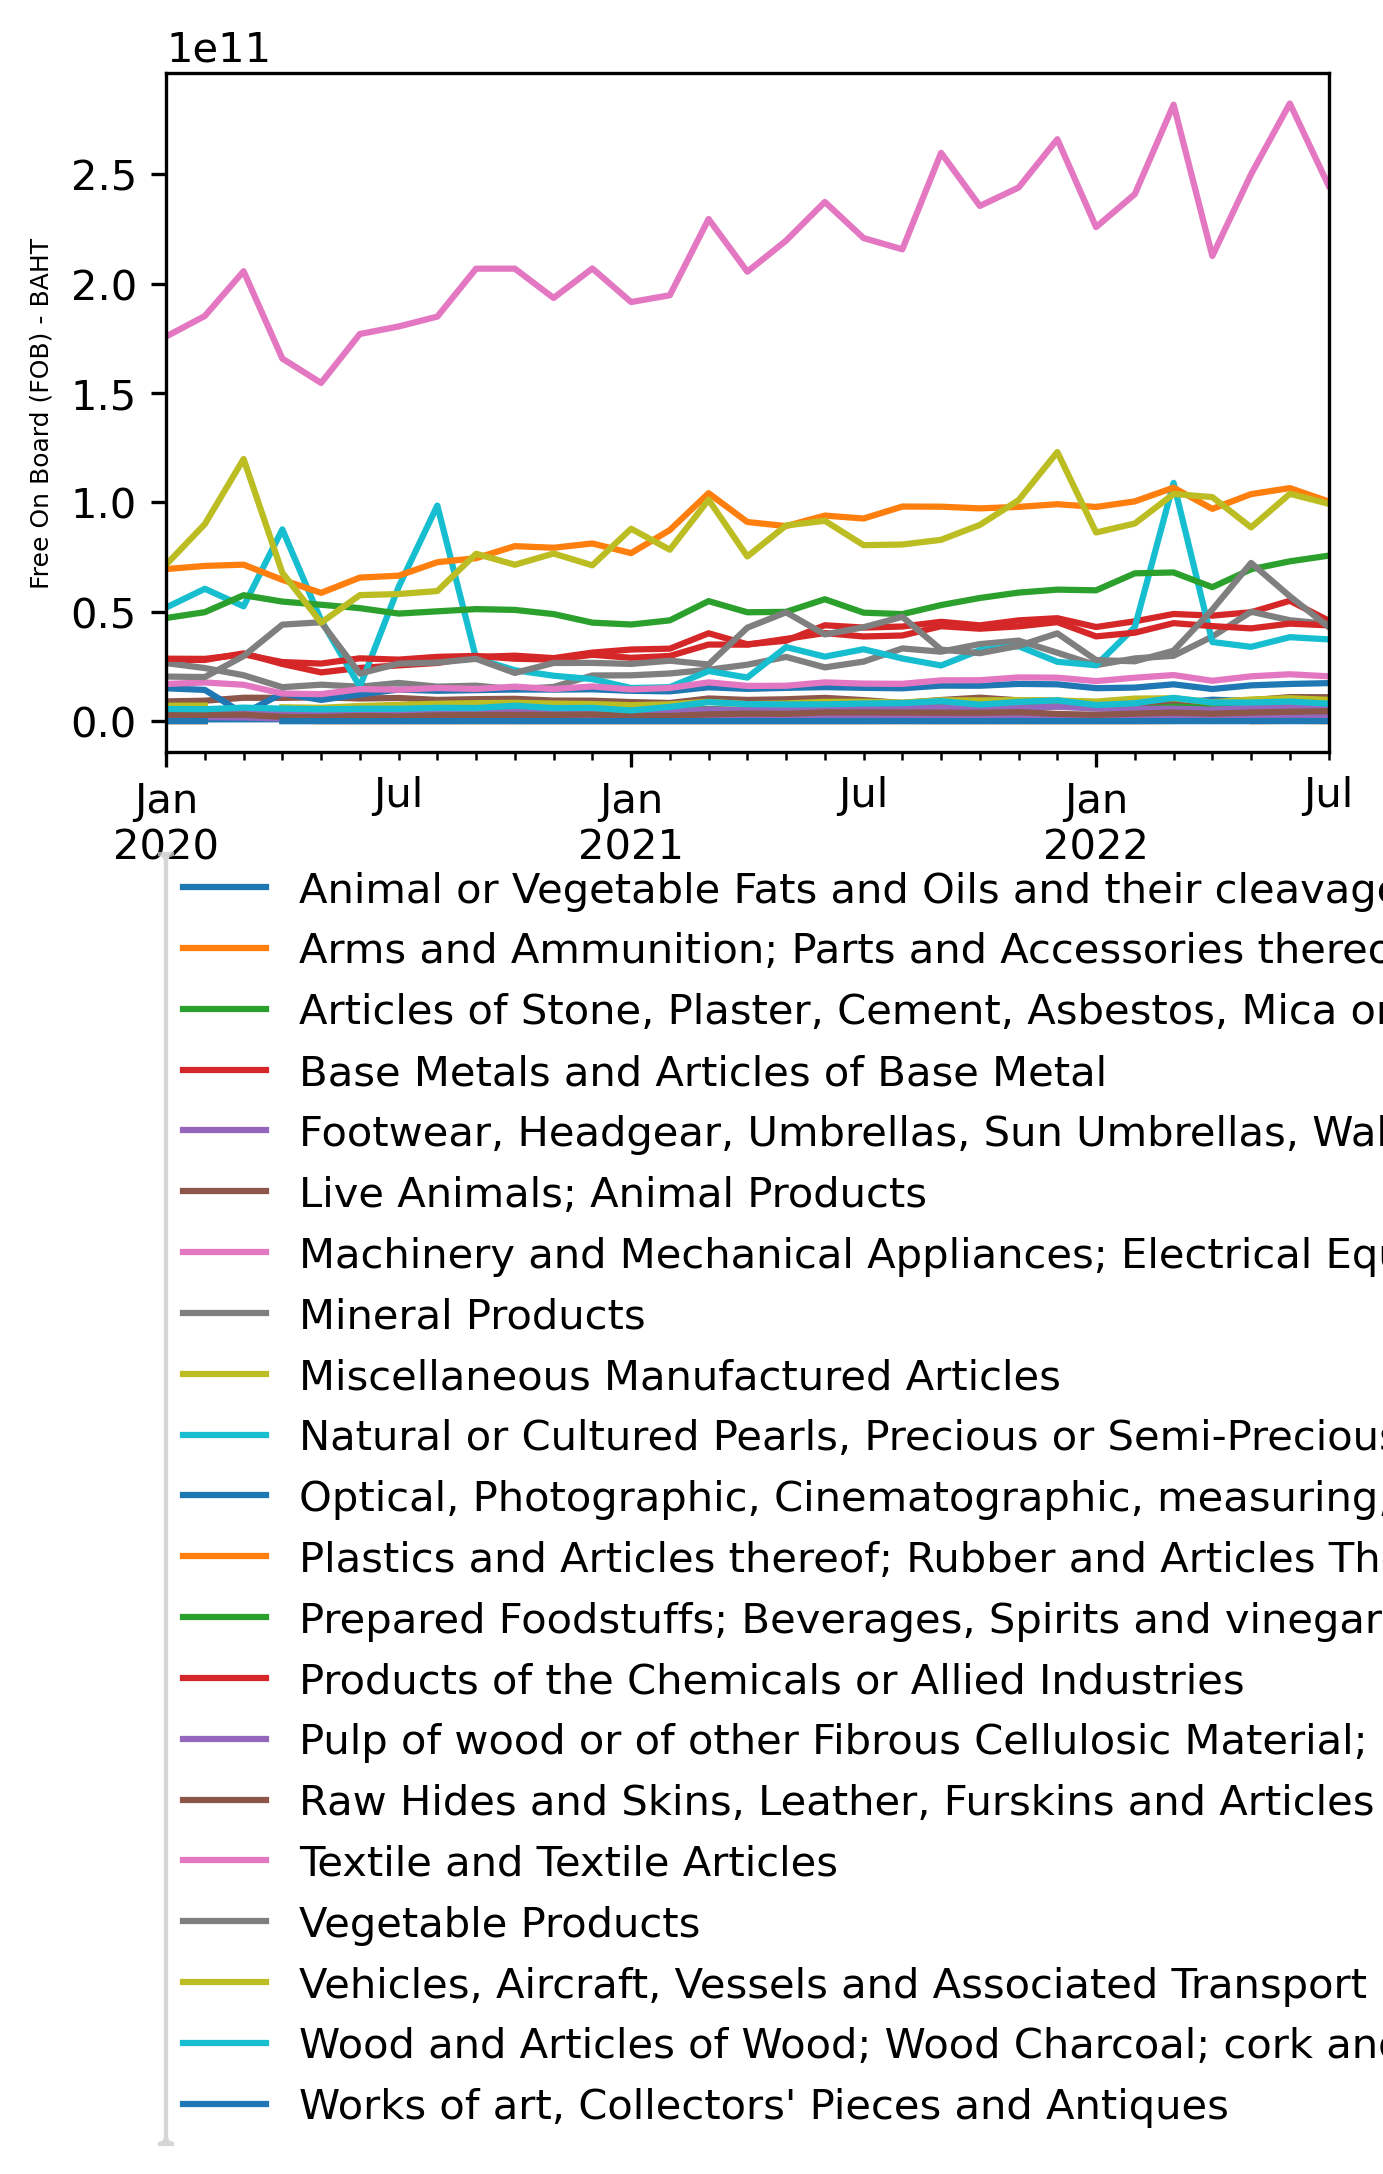

In [53]:
#Line graph of FOB of 21 sections
fig, ax = plt.subplots(figsize=(5,3), dpi=300) # Create figure with one subplot
#ax.set_title('Thailand Export Trends (Jan2020 - Jul2022)', fontsize=10)
ax.set_ylabel('Free On Board (FOB) - BAHT', fontsize=6)
df_pivot.plot(ax=ax)
ax.set_xlabel('')
#ax.legend(bbox_to_anchor=(1.1, 1.05))
ax.legend(bbox_to_anchor=(0., -0.15), loc='upper left',ncol=1, mode="expand", borderaxespad=0)
#ax.get_legend().remove()

In [68]:
df_MachinerySec = df_main[df_main['Section'] == 16][
    ['Section','Section_Description', 'Year', 'Date', 'Monthly_FOB(BAHT)', 'Country', 'HS Code',
     'Statistic Code', 'Description', 'HS_Code_Chapter', 'HS_Code_Heading', 'HS_Code_Sub_Heading(HS_Code)',
     'HS_Code_Sub_Heading(Detemines_Duty)', 'Description_HS_CODE_Chapter' ] ]
#display(df_MachinerySec)
df_MachineryChapter = df_MachinerySec.pivot_table( index='Date', columns='Description_HS_CODE_Chapter', values='Monthly_FOB(BAHT)', aggfunc='sum' )
#df_2022pivot = df_2022pivot.reindex(df_2022pivot['2022'].sort_values(ascending=False).index)
display(df_MachineryChapter)
#display(df_MachineryChapter.index)

Description_HS_CODE_Chapter,ELECTRICAL MACHINERY AND EQUIPMENT,"NUCLEAR REACTORS , MACHINERY AND MECHANICAL APPLIANCES; PARTS THEREOF"
Date,,
2020-01-01,77799765560,98044642454
2020-02-01,77790039242,107429199386
2020-03-01,88447401421,117234347734
2020-04-01,82476955166,83291046104
2020-05-01,75553380823,79071903431
2020-06-01,83276523840,93711281377
2020-07-01,84138111973,96292372517
2020-08-01,90551692722,94400405106
2020-09-01,101422581102,105429325630


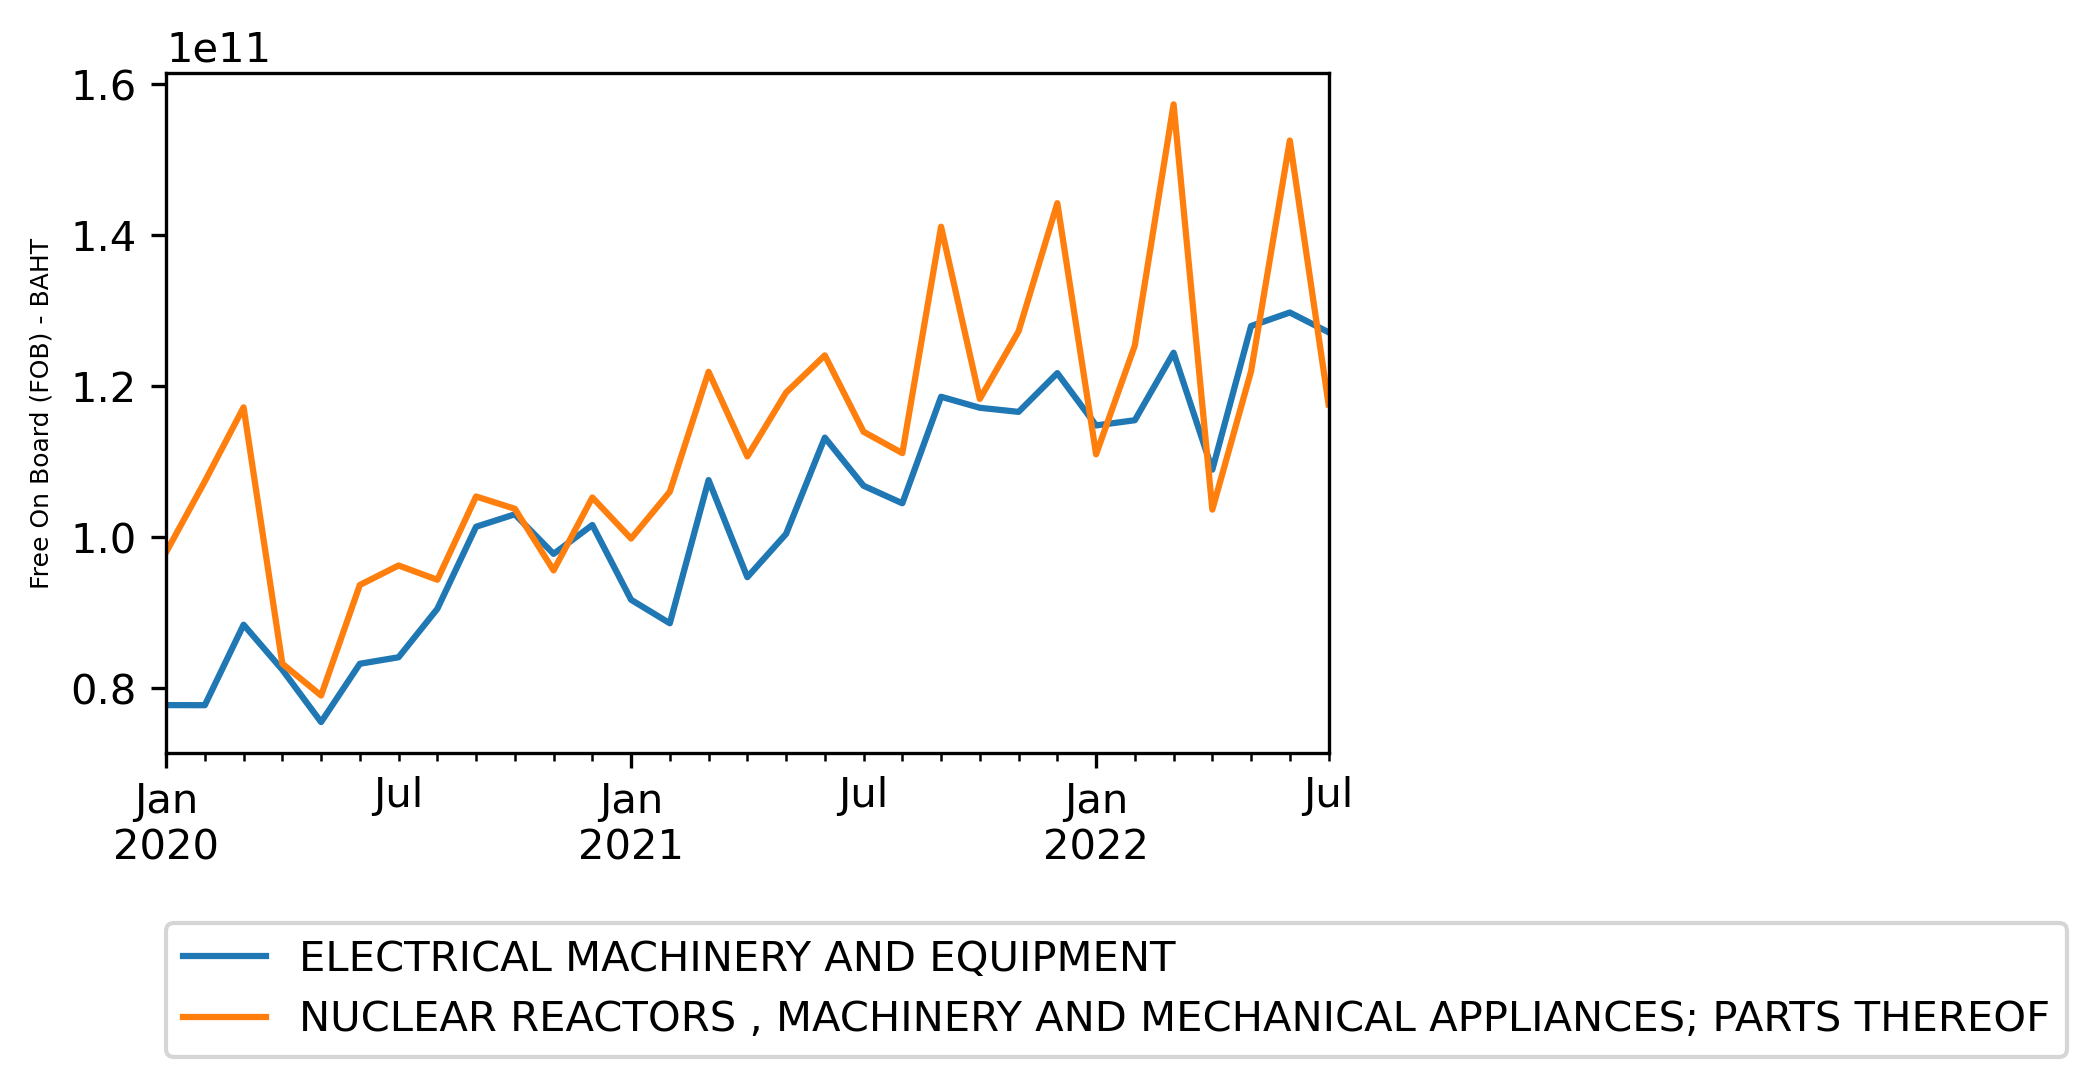

In [79]:
#Line graph of FOB of Machinery Chapter
fig, ax = plt.subplots(figsize=(5,3), dpi=300) # Create figure with one subplot
#ax.set_title('Thailand Export Trends (Jan2020 - Jul2022)', fontsize=10)
ax.set_ylabel('Free On Board (FOB) - BAHT', fontsize=6)
df_MachineryChapter.plot(ax=ax)
ax.set_xlabel('')
#ax.legend(bbox_to_anchor=(1.1, 1.05))
ax.legend(bbox_to_anchor=(0, -0.25), loc='upper left',ncol=1, borderaxespad=0)
#ax.get_legend().remove()

In [92]:
df_MachineryHeading = df_MachinerySec.pivot_table( index='Date', columns=['HS_Code_Chapter','HS_Code_Heading'], values='Monthly_FOB(BAHT)', aggfunc='sum' )
#df_2022pivot = df_2022pivot.reindex(df_2022pivot['2022'].sort_values(ascending=False).index)
display(df_MachineryHeading)
#display(df_MachineryHeading.index)

HS_Code_Chapter        84                                                    \
HS_Code_Heading        01           02          03           04          05   
Date                                                                          
2020-01-01            NaN   13348981.0   1144674.0    9287995.0  28516616.0   
2020-02-01            NaN   37598823.0    303989.0      55428.0  35171699.0   
2020-03-01            NaN  146322328.0   6455643.0    1408276.0  30526855.0   
2020-04-01            NaN  116962793.0   3408769.0    2419018.0  27917607.0   
2020-05-01       102776.0   17878272.0    564890.0    1978287.0  22497502.0   
2020-06-01            0.0   85622170.0   7510044.0   14777869.0  38523748.0   
2020-07-01            0.0   68315205.0   1525356.0    9287941.0  33336852.0   
2020-08-01            0.0   54730010.0  62104119.0    1884954.0  37074792.0   
2020-09-01            0.0  104910073.0   2671594.0    2547176.0  40493592.0   
2020-10-01          631.0   68482556.0  16099406.0    3521617.0  49229681.0   
2020-11-01            0.0   84942809.0  14420288.0   20248939.0  28491395.0   
2020-12-01            0.0   94627123.0  20007906.0      43665.0  21929050.0   
2021-01-01         8048.0    6849604.0   1173072.0  241779164.0  67910750.0   
2021-02-01        98937.0   49643695.0    224907.0  135947067.0  18270513.0   
2021-03-01            0.0   23674835.0    426450.0      58194.0  29629151.0   
2021-04-01            0.0  100474858.0     89382.0     372156.0   9227344.0   
2021-05-01            0.0   28861157.0   1626520.0  139752369.0  38624395.0   
2021-06-01            0.0   31978601.0     30273.0    1264364.0  40877812.0   
2021-07-01            0.0  118095199.0      1990.0   92300749.0  31618540.0   
2021-08-01         1500.0   84577356.0         0.0    3775788.0  36360049.0   
2021-09-01            0.0   58199219.0   1184500.0     241355.0  56585528.0   
2021-10-01            0.0   65151540.0   6882192.0    2477027.0  29380291.0   
2021-11-01        81894.0   30061359.0         0.0   66279106.0  31304548.0   
2021-12-01            0.0   15138409.0         0.0    1521681.0  58440460.0   
2022-01-01          970.0   13342649.0    267216.0   13439840.0  21256699.0   
2022-02-01         9908.0   31422629.0     74061.0   18115821.0  38635640.0   
2022-03-01            0.0  149584359.0         0.0    1258989.0  47797996.0   
2022-04-01        34314.0   25244345.0     45008.0    6026017.0  35326900.0   
2022-05-01            0.0   10976893.0      8700.0  126997290.0  39341598.0   
2022-06-01            1.0   19556323.0     45766.0     810563.0  61930473.0   
2022-07-01       153434.0   34232165.0         0.0    9068881.0  49203871.0   

HS_Code_Chapter                                                         \
HS_Code_Heading           06            07            08            09   
Date                                                                     
2020-01-01               NaN  3.643111e+09  3.217711e+09  2.998774e+09   
2020-02-01        19219078.0  1.064024e+10  3.523969e+09  3.450058e+09   
2020-03-01        25552676.0  4.016523e+09  3.361560e+09  3.393835e+09   
2020-04-01          959603.0  2.561379e+09  2.071647e+09  2.591277e+09   
2020-05-01               0.0  4.178984e+09  7.124434e+08  1.372057e+09   
2020-06-01         1265910.0  4.134613e+09  1.445281e+09  1.345828e+09   
2020-07-01          722768.0  8.488335e+09  1.379841e+09  1.730333e+09   
2020-08-01        50325516.0  2.212179e+09  2.397097e+09  2.537854e+09   
2020-09-01         6682286.0  2.198238e+09  3.145500e+09  2.986835e+09   
2020-10-01        19788548.0  3.271288e+09  3.132058e+09  3.299341e+09   
2020-11-01          560044.0  2.442166e+09  3.397909e+09  3.155499e+09   
2020-12-01         5080984.0  2.288528e+09  3.092575e+09  3.449300e+09   
2021-01-01         1282534.0  2.041978e+09  3.595067e+09  3.427660e+09   
2021-02-01        22270008.0  2.310732e+09  4.096219e+09  3.873260e+09   
2021-03-01               0.0  2.643567e+09  4.316336e+0

In [85]:
df_MachineryHeadingSort = df_MachinerySec.pivot_table( index=['HS_Code_Chapter','HS_Code_Heading'], columns='Date', values='Monthly_FOB(BAHT)', aggfunc='sum' )
df_MachineryHeadingSort = df_MachineryHeadingSort.reindex(df_MachineryHeadingSort['2022-06-01'].sort_values(ascending=False).index)
display(df_MachineryHeadingSort)
#display(df_MachineryHeadingSort.index)

Date                               2020-01-01    2020-02-01    2020-03-01  \
HS_Code_Chapter HS_Code_Heading                                             
84              71               2.860789e+10  2.852739e+10  4.076013e+10   
85              42               1.649935e+10  1.646358e+10  1.925075e+10   
                17               8.691674e+09  8.087147e+09  8.838354e+09   
84              15               1.580284e+10  1.736376e+10  1.979764e+10   
                43               7.330320e+09  6.753688e+09  5.284575e+09   
...                                       ...           ...           ...   
                85                        NaN           NaN           NaN   
                01                        NaN           NaN           NaN   
                34               4.574442e+06  3.628384e+06  1.566428e+06   
                06                        NaN  1.921908e+07  2.555268e+07   
                49                        NaN  6.655200e+04  0.000000e+00   

Date                               2020-04-01    2020-05-01    2020-06-01  \
HS_Code_Chapter HS_Code_Heading                                             
84              71               2.597820e+10  2.641626e+10  3.386291e+10   
85              42               1.936783e+10  1.760588e+10  1.836861e+10   
                17               9.603559e+09  1.129053e+10  1.382974e+10   
84              15               1.166723e+10  1.070517e+10  1.286179e+10   
                43               6.817198e+09  6.781037e+09  7.805821e+09   
...                                       ...           ...           ...   
                85                        NaN           NaN           NaN   
                01                        NaN  1.027760e+05  0.000000e+00   
                34               0.000000e+00  1.874734e+07  9.550000e+02   
                06               9.596030e+05  0.000000e+00  1.265910e+06   
                49               0.000000e+00  1.922000e+03  0.000000e+00   

Date                               2020-07-01    2020-08-01    2020-09-01  \
HS_Code_Chapter HS_Code_Heading                                             
84              71               2.910904e+10  2.950196e+10  3.431968e+10   
85              42               1.721126e+10  1.750925e+10  1.990742e+10   
                17               1.201451e+10  1.376754e+10  1.566940e+10   
84              15               1.178205e+10  1.098479e+10  1.247544e+10   
                43               7.951644e+09  8.972294e+09  9.867983e+09   
...                                       ...           ...           ...   
                85                        NaN           NaN           NaN   
                01               0.000000e+00  0.000000e+00  0.000000e+00   
                34               5.265091e+06  2.405259e+06  4.597626e+06   
                06               7.227680e+05  5.032552e+07  6.682286e+06   
                49               9.964590e+05  0.000000e+00  1.554000e+03   

Date                               2020-10-01  ...    2021-10-01  \
HS_Code_Chapter HS_Code_Heading                ...                 
84              71               3.076926e+10  ...  3.426544e+10   
85              42               2.004856e+10  ...  2.531149e+10   
                17               1.664600e+10  ...  1.728187e+10   
84              15               1.207971e+10  ...  1.596170e+10   
                43               1.062921e+10  ...  9.746600e+09   
...                                       ...  ...           ...   
                85                        NaN  ...           NaN   
                01               6.310000e+02  ...  0.000000e+00   
                34               2.972578e+06  ...  1.850000e+03   
                06               1.978855e+07  ...  7.351280e+05   
                49               0.000000e+00  ...  1.699500e+04   

Date                               2021-11-01    2021-12-01    2022-01-01  \
HS_Code_Chapter HS_Code_Heading 

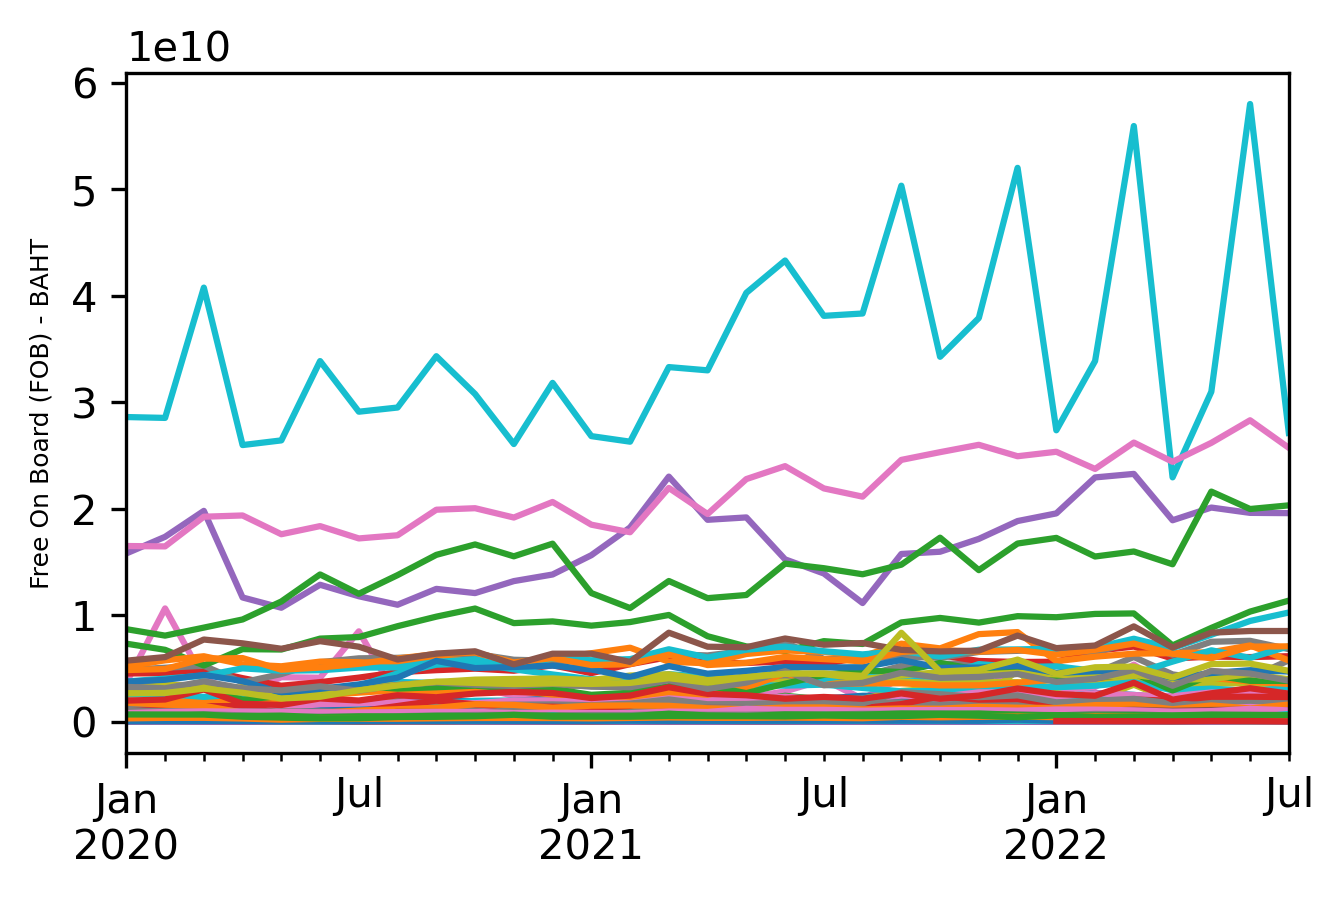

In [93]:
#Line graph of FOB of Machinery Heading
fig, ax = plt.subplots(figsize=(5,3), dpi=300) # Create figure with one subplot
#ax.set_title('Thailand Export Trends (Jan2020 - Jul2022)', fontsize=10)
ax.set_ylabel('Free On Board (FOB) - BAHT', fontsize=6)
df_MachineryHeading.plot(ax=ax)
ax.set_xlabel('')
#ax.legend(bbox_to_anchor=(1.1, 1.05))
ax.legend(bbox_to_anchor=(0, -0.25), loc='upper left',ncol=5, borderaxespad=0)
ax.get_legend().remove()

In [289]:
df_8471 = df_main[(df_main['Section'] == 16) & (df_main['HS_Code_Chapter'] == 84) & (df_main['HS_Code_Heading'] == '71')][
    ['Section','Section_Description', 'Year', 'Date', 'Monthly_FOB(BAHT)', 'Country', 'HS Code',
     'Statistic Code', 'Description', 'HS_Code_Chapter', 'HS_Code_Heading', 'HS_Code_Sub_Heading(HS_Code)',
     'HS_Code_Sub_Heading(Detemines_Duty)', 'Description_HS_CODE_Chapter' ] ]

#display(df_8471)
#display(df_8471['HS Code'].unique())
df_8471_HS = df_8471.pivot_table( index='Date', columns='HS Code', values='Monthly_FOB(BAHT)', aggfunc='sum' )
#df_2022pivot = df_2022pivot.reindex(df_2022pivot['2022'].sort_values(ascending=False).index)
display(df_8471_HS)
#display(df_MachineryChapter.index)

HS Code,84713020,84713090,84714110,84714190,84714910,84714990,84715010,84715090,84716030,84716040,...,84717090,84717091,84717099,84718010,84718070,84718090,84719010,84719030,84719040,84719090
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-01,8.924642e+08,34798258.0,13696380.0,33676213.0,4092129.0,62567990.0,1.113770e+07,76546161.0,21940919.0,16807783.0,...,NaN,3403735.0,7.349250e+08,46203385.0,193162.0,100843501.0,7146289.0,128002.0,420889.0,620763770.0
2020-02-01,1.645376e+08,13056320.0,3351384.0,8222800.0,1766597.0,156218741.0,1.042585e+07,67073284.0,4753854.0,1369135.0,...,NaN,8802118.0,7.623843e+08,57679200.0,216942.0,62301710.0,4928967.0,8449.0,232440.0,335531368.0
2020-03-01,1.469321e+09,22762800.0,8562924.0,58216002.0,881283.0,23549252.0,2.608009e+07,82856253.0,9744855.0,1653660.0,...,NaN,0.0,1.102934e+09,45343883.0,276829.0,87949540.0,3769235.0,82973.0,448563.0,345956521.0
2020-04-01,1.106093e+09,47776789.0,9263884.0,24144277.0,2329150.0,21995483.0,6.814350e+07,107636319.0,6929067.0,1409350.0,...,NaN,2230745.0,6.346305e+08,40823046.0,5680517.0,78162903.0,5511127.0,0.0,444310.0,301152197.0
2020-05-01,7.864212e+08,188519712.0,4103238.0,9083042.0,7511.0,26750621.0,2.980016e+07,61880675.0,6304931.0,14718276.0,...,NaN,3319.0,1.092985e+09,54751942.0,53979.0,90512256.0,3320190.0,0.0,2105330.0,269373078.0
2020-06-01,1.106664e+09,24297226.0,4565934.0,22177740.0,7827911.0,32653390.0,8.604365e+06,143556282.0,4808529.0,62493471.0,...,NaN,0.0,1.152890e+09,28650957.0,51391.0,148752788.0,5285738.0,5671.0,99213.0,308293780.0
2020-07-01,1.115635e+09,89615670.0,10196251.0,45555147.0,532561.0,31683888.0,5.930258e+06,79257978.0,2959738.0,111007579.0,...,NaN,380266.0,1.117009e+09,27174477.0,153865.0,109113723.0,3957683.0,24020.0,948845.0,354590479.0
2020-08-01,8.192978e+08,77665438.0,6016582.0,20961736.0,1370790.0,15063356.0,1.178507e+07,89838091.0,6280134.0,107266810.0,...,NaN,416541.0,1.613967e+09,34460699.0,928522.0,181207760.0,5750398.0,3854.0,2054424.0,253150520.0
2020-09-01,9.195709e+08,107599751.0,5646626.0,29596088.0,4171649.0,49574194.0,6.252629e+06,60085675.0,4737669.0,92882734.0,...,NaN,32747.0,1.589014e+09,60494714.0,250147.0,145997853.0,3425916.0,48346.0,751963.0,210908488.0


In [290]:
df_8471['%'] = df_8471.groupby('Year')['Monthly_FOB(BAHT)'].transform(lambda x: (x/sum(x))*100)
display(df_8471.groupby('Year').sum())

df_8471percent = df_8471.pivot_table( index=['HS_Code_Sub_Heading(HS_Code)'], columns=['Year'], values='%', aggfunc='sum' )
display(df_8471percent)

,Section,Monthly_FOB(BAHT),HS_Code_Chapter,%
Year,,,,
2020,11856,365743662988,62244,100.0
2021,11520,453928155167,60480,100.0
2022,6128,256206323225,32172,100.0


Year,2020,2021,2022
HS_Code_Sub_Heading(HS_Code),,,
30,3.508687,4.866078,2.541101
41,0.111246,0.123072,0.076564
49,0.145238,0.075990,0.053332
50,0.343797,0.285578,2.846431
60,0.438363,0.517302,0.539081
70,93.752306,92.407222,91.483854
80,0.602425,0.745809,1.445386
90,1.097939,0.978948,1.014252


Text(0.5, 0, '')

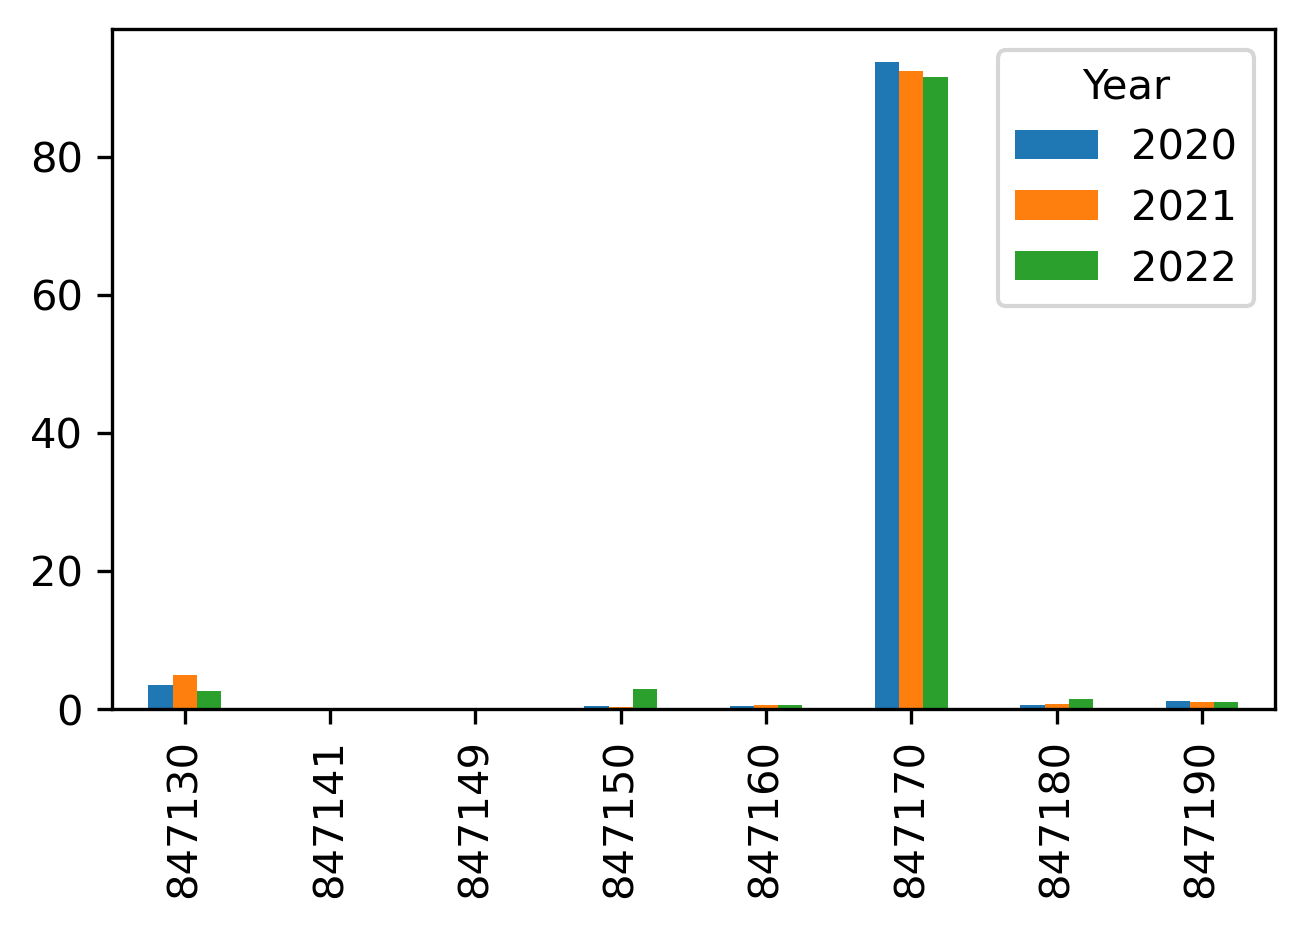

In [266]:
fig, ax = plt.subplots(figsize=(5,3), dpi=300)
df_8471percent.plot.bar(ax=ax)

lst = []
for i in range(len(df_8471percent.index)):
    x = '8471'+str(df_8471percent.index[i])
    lst.append(x)
ax.set(xticklabels=lst)
ax.set_xlabel('',fontsize=0.1)

In [327]:
df_8471_2 = df_8471.loc[:,['HS Code','Year','%']]
df_8471_2['Sub–Heading(HS Code)Full'] = df_8471['HS_Code_Chapter'].astype('string') + df_8471['HS_Code_Heading'] + df_8471['HS_Code_Sub_Heading(HS_Code)']
df_8471_2.loc[df_8471_2['Sub–Heading(HS Code)Full']!= '847170', 'Sub–Heading(HS Code)Full'] = 'Others'
df_8471_2pivot = df_8471_2.pivot_table( index='Sub–Heading(HS Code)Full', columns='Year', values='%', aggfunc='sum' )
#df_8471_2pivot['2020']# = df_8471_2.map('{:,.2f}'.format)

display(df_8471_2pivot)



Year,2020,2021,2022
Sub–Heading(HS Code)Full,,,
847170,93.75,92.41,91.48
Others,6.25,7.59,8.52


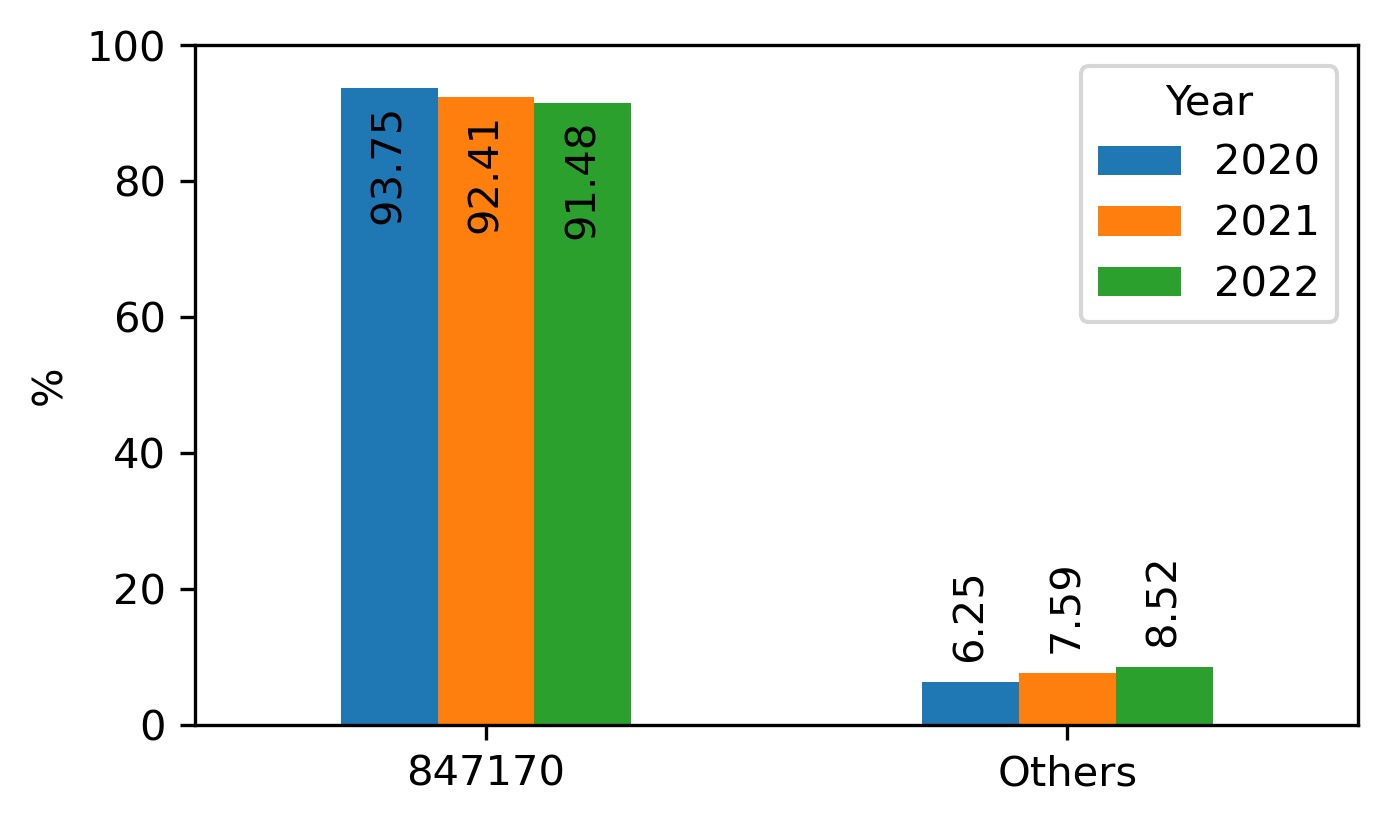

In [347]:
fig, ax = plt.subplots(figsize=(5,3), dpi=300)
df_8471_2pivot.plot.bar(ax=ax)

#lst = []
#for i in range(len(df_8471percent.index)):
    #x = '8471'+str(df_8471percent.index[i])
    #lst.append(x)
#ax.set(xticklabels=lst)
ax.set_xlabel('')
ax.set_ylabel('%')
ax.set_xticklabels(['847170','Others'],rotation=0)
plt.ylim([0, 100])
for bar in ax.patches:
    height = bar.get_height()
    height1 = "{:.2f}".format(height)
    label_x_pos = bar.get_x() + bar.get_width() / 2
    if height > 90:
        ax.text(label_x_pos, height-20, s=f'{height1}', ha='center', va='bottom', rotation=90)
    else:
        ax.text(label_x_pos, height+3, s=f'{height1}', ha='center', va='bottom', rotation=90)




In [ ]:
# H bar chart of FOB percent by section each year
fig, ax = plt.subplots(figsize=(5,3), dpi=300) # Create figure with one subplot
#ax.set_title('Thailand Export Trends (Jan2020 - Jul2022)', fontsize=10)
df_percent2.plot.barh(ax=ax)
ax.set_xlabel('Percentage')
ax.get_yaxis().set_visible(False)
#ax.legend(bbox_to_anchor=(1.1, 1.05))
ax.legend(bbox_to_anchor=(0, -0.25), loc='upper left',ncol=5, borderaxespad=0)
#ax.get_legend().remove()

In [110]:
df_8471_HS2 = df_8471.pivot_table( index='HS Code', columns='Date', values='Monthly_FOB(BAHT)', aggfunc='sum' )
df_8471_HS2 = df_8471_HS2.reindex(df_8471_HS2['2021-07-01'].sort_values(ascending=False).index)
display(df_8471_HS2['2021-07-01'])
#display(df_MachineryChapter.index)

HS Code
84717020    2.070228e+10
84717050    1.373988e+10
84713020    2.022697e+09
84717099    5.924552e+08
84719090    4.173365e+08
84718090    1.740409e+08
84716040    1.674912e+08
84716090    6.315134e+07
84715090    6.181015e+07
84718010    5.984694e+07
84713090    3.622794e+07
84714190    2.275889e+07
84714990    1.477229e+07
84716030    1.379927e+07
84714910    5.561037e+06
84719010    4.391820e+06
84714110    3.181121e+06
84715010    3.076824e+06
84717030    1.079718e+06
84717040    1.069065e+06
84718070    6.925740e+05
84719040    5.237490e+05
84717010    2.581090e+05
84717091    9.125000e+03
84719030    0.000000e+00
84717090             NaN
Name: 2021-07-01 00:00:00, dtype: float64

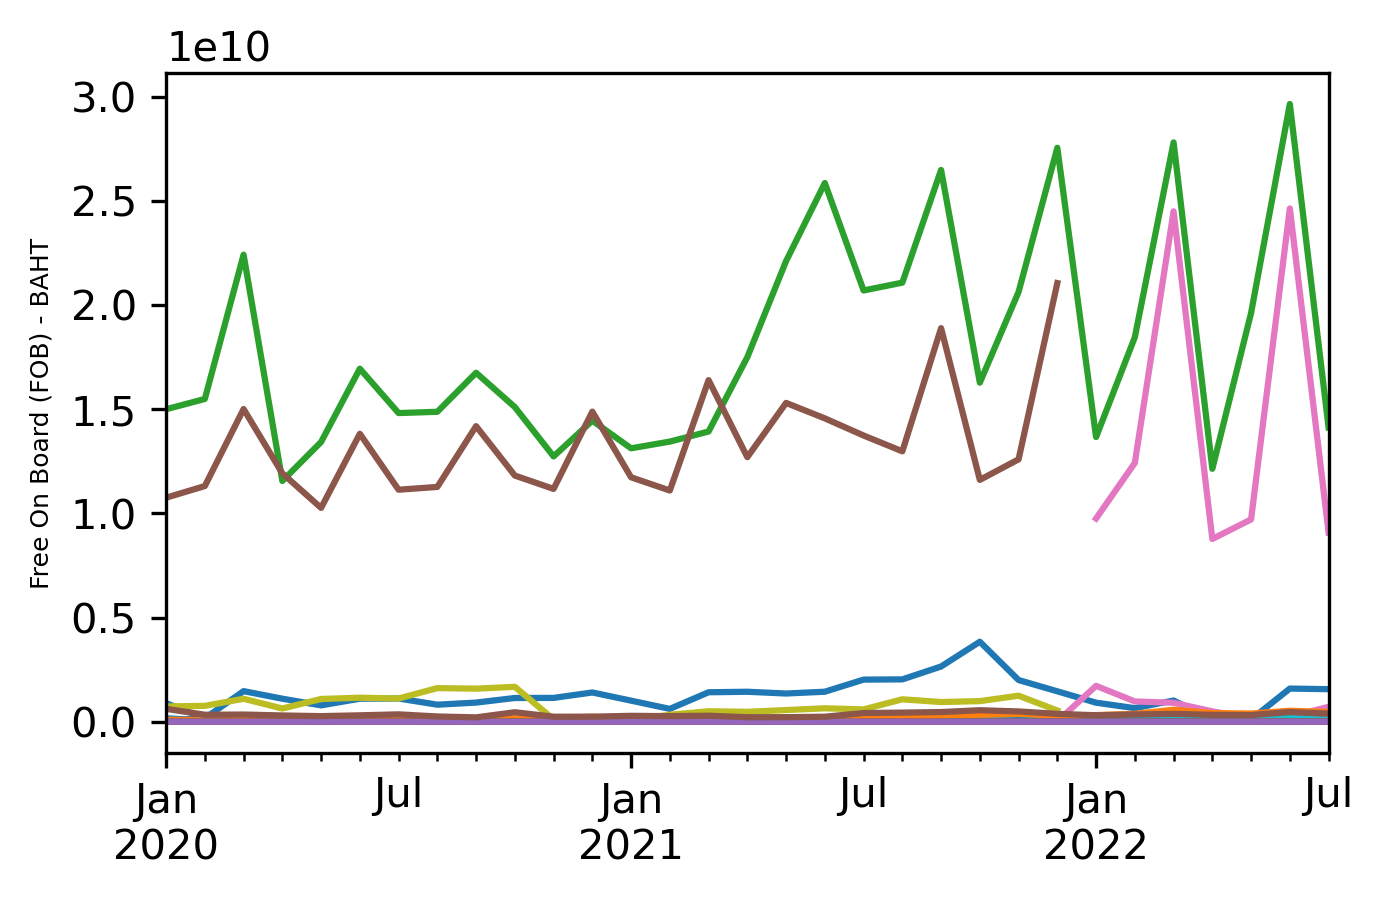

In [111]:
#Line graph of FOB of 8471 HS Code
fig, ax = plt.subplots(figsize=(5,3), dpi=300) # Create figure with one subplot
#ax.set_title('Thailand Export Trends (Jan2020 - Jul2022)', fontsize=10)
ax.set_ylabel('Free On Board (FOB) - BAHT', fontsize=6)
df_8471_HS.plot(ax=ax)
ax.set_xlabel('')
#ax.legend(bbox_to_anchor=(1.1, 1.05))
ax.legend(bbox_to_anchor=(0, -0.25), loc='upper left',ncol=5, borderaxespad=0)
ax.get_legend().remove()

In [113]:
df_847170 = df_main[(df_main['Section'] == 16) & (df_main['HS_Code_Chapter'] == 84) & (df_main['HS_Code_Heading'] == '71') & (df_main['HS_Code_Sub_Heading(HS_Code)'] == '70')][
    ['Section','Section_Description', 'Year', 'Date', 'Monthly_FOB(BAHT)', 'Country', 'HS Code',
     'Statistic Code', 'Description', 'HS_Code_Chapter', 'HS_Code_Heading', 'HS_Code_Sub_Heading(HS_Code)',
     'HS_Code_Sub_Heading(Detemines_Duty)', 'Description_HS_CODE_Chapter' ] ]

display(df_847170)
#display(df_8471['HS Code'].unique())
df_847170_Country = df_847170.pivot_table( index='Date', columns='Country', values='Monthly_FOB(BAHT)', aggfunc='sum' )
#df_2022pivot = df_2022pivot.reindex(df_2022pivot['2022'].sort_values(ascending=False).index)
display(df_847170_Country)
#display(df_MachineryChapter.index)

,Section,Section_Description,Year,Date,Monthly_FOB(BAHT),Country,HS Code,Statistic Code,Description,HS_Code_Chapter,HS_Code_Heading,HS_Code_Sub_Heading(HS_Code),HS_Code_Sub_Heading(Detemines_Duty),Description_HS_CODE_Chapter
6512,16,Machinery and Mechanical Appliances; Electrica...,2022,2022-01-01,13633371423,AE,84717020,000,Hard disk drives (C62),84,71,70,20,"NUCLEAR REACTORS , MACHINERY AND MECHANICAL AP..."
6513,16,Machinery and Mechanical Appliances; Electrica...,2022,2022-01-01,31440408,IE,84717020,800,Used (C62),84,71,70,20,"NUCLEAR REACTORS , MACHINERY AND MECHANICAL AP..."
6514,16,Machinery and Mechanical Appliances; Electrica...,2022,2022-01-01,1540813,JP,84717030,000,Tape drives (C62),84,71,70,30,"NUCLEAR REACTORS , MACHINERY AND MECHANICAL AP..."
6515,16,Machinery and Mechanical Appliances; Electrica...,2022,2022-01-01,7500,MM,84717030,800,Used (C62),84,71,70,30,"NUCLEAR REACTORS , MACHINERY AND MECHANICAL AP..."
6516,16,Machinery and Mechanical Appliances; Electrica...,2022,2022-01-01,2874998,AU,84717040,000,"Optical disk drives, including CD-ROM drives, ...",84,71,70,40,"NUCLEAR REACTORS , MACHINERY AND MECHANICAL AP..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322970,16,Machinery and Mechanical Appliances; Electrica...,2020,2020-12-01,40633,CN,84717091,000,Automated backup systems (C62),84,71,70,91,"NUCLEAR REACTORS , MACHINERY AND MECHANICAL AP..."
322971,16,Machinery and Mechanical Appliances; Electrica...,2020,2020-12-01,0,MM,84717091,999,CKD (KGM),84,71,70,91,"NUCLEAR REACTORS , MACHINERY AND MECHANICAL AP..."
322972,16,Machinery and Mechanical Appliances; Electrica...,2020,2020-12-01,76086237,AE,84717099,000,Other (C62),84,71,70,99,"NUCLEAR REACTORS , MACHINERY AND MECHANICAL AP..."
322973,16,Machinery and Mechanical Appliances; Electrica...,2020,2020-12-01,467336,HK,84717099,800,Used (C62),84,71,70,99,"NUCLEAR REACTORS , MACHINERY AND MECHANICAL AP..."


Country,AE,AU,CA,CH,CN,DE,EG,GB,HK,ID,...,IN,JP,KH,KR,LA,MM,MY,TW,US,VN
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-01,2.648987e+10,2693915.0,1592.0,NaN,NaN,NaN,NaN,NaN,307463.0,NaN,...,198889.0,NaN,NaN,30.0,3725.0,3403735.0,929.0,320027.0,NaN,NaN
2020-02-01,2.756672e+10,2446997.0,NaN,NaN,2958764.0,188860.0,NaN,NaN,1090589.0,NaN,...,496621.0,NaN,NaN,0.0,8802118.0,0.0,0.0,137166.0,NaN,NaN
2020-03-01,3.852935e+10,4167008.0,NaN,NaN,0.0,3676554.0,NaN,NaN,NaN,NaN,...,28127.0,NaN,NaN,42325.0,0.0,0.0,NaN,135496.0,NaN,NaN
2020-04-01,2.411660e+10,1095372.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,0.0,9.0,NaN,0.0,2230745.0,0.0,NaN,0.0,NaN,NaN
2020-05-01,2.478648e+10,3245449.0,NaN,NaN,158535.0,97395.0,NaN,NaN,NaN,NaN,...,25136.0,0.0,NaN,0.0,3319.0,0.0,NaN,0.0,NaN,NaN
2020-06-01,3.192125e+10,5656741.0,NaN,NaN,0.0,259172.0,NaN,NaN,1900.0,NaN,...,0.0,0.0,NaN,0.0,0.0,0.0,NaN,0.0,NaN,NaN
2020-07-01,2.706177e+10,8908514.0,NaN,NaN,380266.0,10240940.0,NaN,NaN,21151.0,NaN,...,14600.0,0.0,NaN,0.0,NaN,0.0,NaN,18665.0,NaN,NaN
2020-08-01,2.775931e+10,6035442.0,NaN,NaN,416541.0,4678288.0,NaN,NaN,1886.0,NaN,...,0.0,0.0,NaN,738206.0,NaN,0.0,NaN,38277.0,NaN,NaN
2020-09-01,3.252714e+10,4082547.0,NaN,NaN,2027919.0,NaN,NaN,NaN,915922.0,NaN,...,0.0,200.0,NaN,22104.0,NaN,0.0,NaN,NaN,NaN,NaN


In [348]:
df_847170['%'] = df_847170.groupby('Year')['Monthly_FOB(BAHT)'].transform(lambda x: (x/sum(x))*100)
df_847170_C = df_847170.loc[:,['Country','Year','%']]
df_847170_Cpivot = df_847170_C.pivot_table( index='Year', columns='Country', values='%', aggfunc='sum' )
#df_8471_2pivot['2020']# = df_8471_2.map('{:,.2f}'.format)

display(df_847170_Cpivot)

Country,AE,AU,CA,CH,CN,DE,EG,GB,HK,ID,...,IN,JP,KH,KR,LA,MM,MY,TW,US,VN
Year,,,,,,,,,,,,,,,,,,,,,
2020,99.94,0.01,0.00,0.00,0.00,0.01,NaN,NaN,0.00,NaN,...,0.00,0.00,NaN,0.00,0.00,0.00,0.00,0.00,NaN,NaN
2021,99.90,0.00,0.01,0.00,0.01,NaN,0.00,0.00,0.00,0.00,...,NaN,0.00,0.00,NaN,0.00,NaN,0.00,NaN,0.00,0.00
2022,99.88,0.01,NaN,NaN,0.00,NaN,NaN,0.00,0.02,NaN,...,0.00,0.00,NaN,NaN,0.00,0.00,NaN,NaN,0.00,NaN


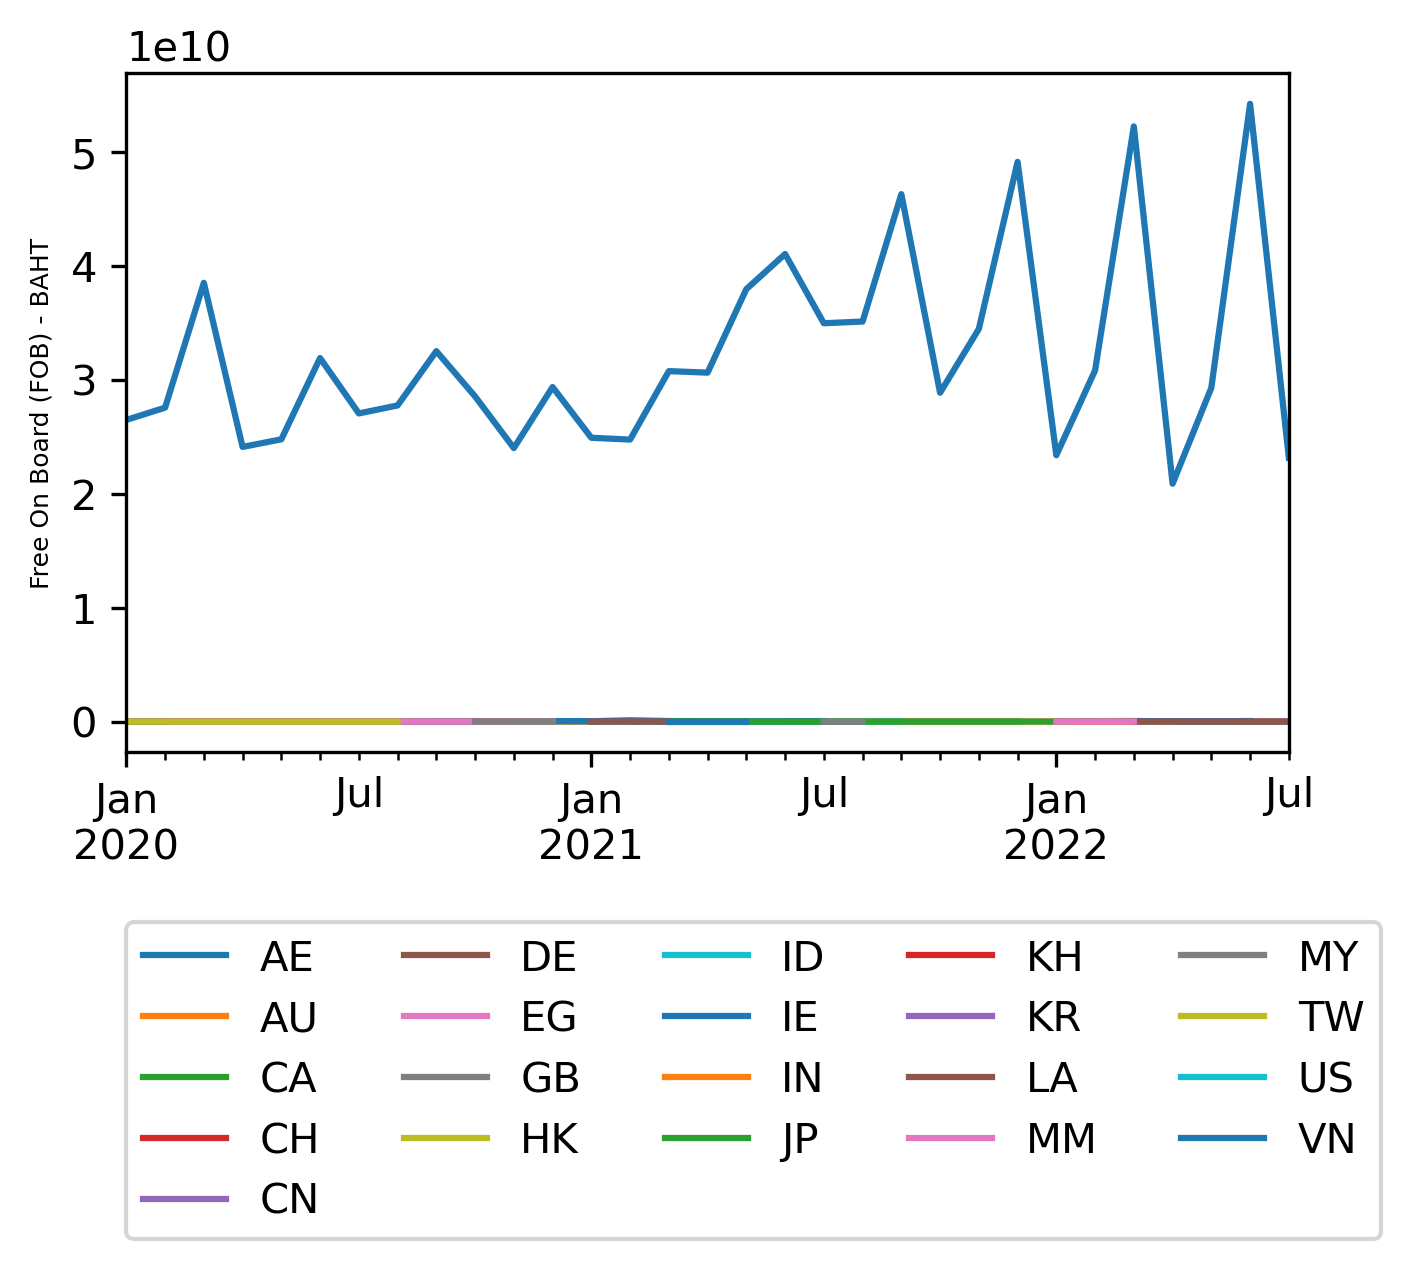

In [117]:
#Line graph of FOB of 8471 HS Code
fig, ax = plt.subplots(figsize=(5,3), dpi=300) # Create figure with one subplot
#ax.set_title('Thailand Export Trends (Jan2020 - Jul2022)', fontsize=10)
ax.set_ylabel('Free On Board (FOB) - BAHT', fontsize=6)
df_847170_Country.plot(ax=ax)
ax.set_xlabel('')
#ax.legend(bbox_to_anchor=(1.1, 1.05))
ax.legend(bbox_to_anchor=(0, -0.25), loc='upper left',ncol=5, borderaxespad=0)
#ax.get_legend().remove()

In [135]:
df_main['%'] = df_main.groupby('Year')['Monthly_FOB(BAHT)'].transform(lambda x: (x/sum(x))*100)
display(df_main.groupby('Year').sum())

df_percent = df_main.pivot_table( index='Section', columns=['Year'], values='%', aggfunc='sum' )
#df_2022pivot = df_2022pivot.reindex(df_2022pivot['2022'].sort_values(ascending=False).index)
display(df_percent)
#display(df_MachineryChapter.index)

,Type,Monthly_Quantity,Monthly_FOB(BAHT),Qty_ByMonth_YearAgo_TilNow,FOB(BAHT)_ByMonth_YearAgo_TilNow,HS_Code_Chapter,Section,%
Year,,,,,,,,
2020,253482,219975527976,7159019967541,1430199300154,46839407709823,7308307,1415071,100.0
2021,254026,244350709553,8563459237207,1563821706139,53149778777865,7351039,1423794,100.0
2022,143756,150210598512,5766109439768,594725021221,22489720552073,4160522,805954,100.0


Year,2020,2021,2022
Section,,,
1,1.683490,1.343777,1.145351
2,4.727051,5.149716,5.394936
3,0.218373,0.525576,0.800840
4,8.516470,7.328472,8.235416
5,3.080345,3.990541,4.570208
6,4.807723,5.359380,5.173362
7,11.946186,13.147367,12.366097
8,0.440167,0.490165,0.460642
9,0.992104,1.106461,1.046100


In [165]:
df_percent2 = df_main[df_main.Year == '2022'].pivot_table( index='Year', columns=['Section'], values='%', aggfunc='sum' )
#df_2022pivot = df_2022pivot.reindex(df_2022pivot['2022'].sort_values(ascending=False).index)
display(df_percent2)
#display(df_MachineryChapter.index)

Section,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
Year,,,,,,,,,,,,,,,,,,,,,
2022,1.145351,5.394936,0.80084,8.235416,4.570208,5.173362,12.366097,0.460642,1.0461,0.731403,...,0.269181,0.851404,5.610033,5.841611,30.150791,11.703032,1.956303,0.06806,1.18977,0.00312


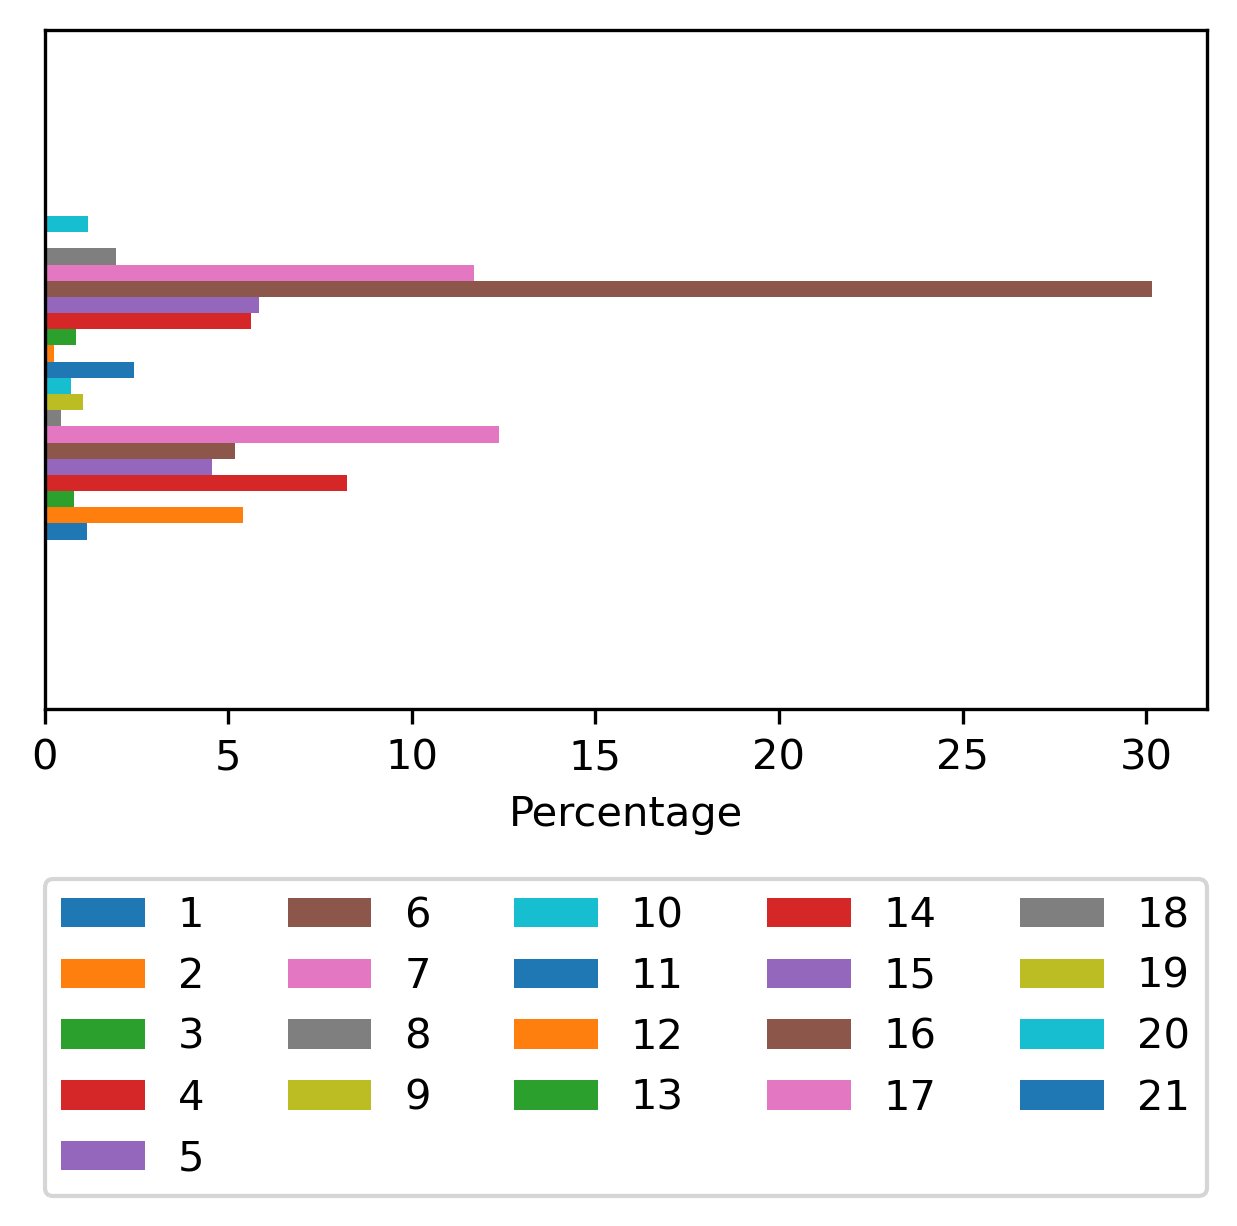

In [166]:
# H bar chart of FOB percent by section each year
fig, ax = plt.subplots(figsize=(5,3), dpi=300) # Create figure with one subplot
#ax.set_title('Thailand Export Trends (Jan2020 - Jul2022)', fontsize=10)
df_percent2.plot.barh(ax=ax)
ax.set_xlabel('Percentage')
ax.get_yaxis().set_visible(False)
#ax.legend(bbox_to_anchor=(1.1, 1.05))
ax.legend(bbox_to_anchor=(0, -0.25), loc='upper left',ncol=5, borderaxespad=0)
#ax.get_legend().remove()



In [206]:
df_percent3 = df_main[df_main.Year == '2022'].pivot_table( index='Section', columns=['Year'], values='%', aggfunc='sum' )
df_percent3 = df_percent3.reindex(df_percent3['2022'].sort_values(ascending=False).index)
display(df_percent3)
section = df_percent3.index
Percent2022 = df_percent3['2022'].values
for i in range(len(Percent2022)):
    Percent2022[i] = "{:.3f}".format(Percent2022[i])
Percent2022

Year,2022
Section,
16,30.150791
7,12.366097
17,11.703032
4,8.235416
15,5.841611
14,5.610033
2,5.394936
6,5.173362
5,4.570208


array([3.0151e+01, 1.2366e+01, 1.1703e+01, 8.2350e+00, 5.8420e+00,
       5.6100e+00, 5.3950e+00, 5.1730e+00, 4.5700e+00, 2.4320e+00,
       1.9560e+00, 1.1900e+00, 1.1450e+00, 1.0460e+00, 8.5100e-01,
       8.0100e-01, 7.3100e-01, 4.6100e-01, 2.6900e-01, 6.8000e-02,
       3.0000e-03])

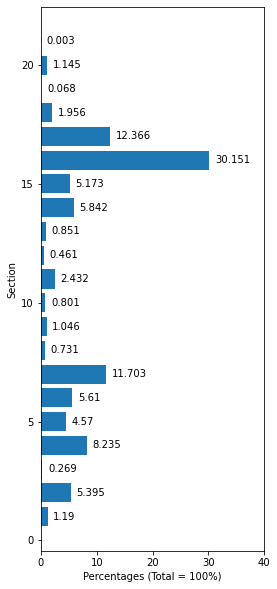

In [225]:
# H bar chart of FOB percent by section 2022

fig, ax = plt.subplots(figsize=(4, 10))
bars = ax.barh(section,Percent2022)
for bar in bars:
  width = bar.get_width()
  label_y_pos = bar.get_y() + bar.get_height() / 2
  ax.text(width+1, label_y_pos, s=f'{width}', va='center')
#for tick in ax.yaxis.get_major_ticks():
  #tick.label.set_fontsize(14)
#for bar in bars[::2]:
  #bar.set_color('r')
#plt.title('The 15 champions with the most HP')
plt.xlabel('Percentages (Total = 100%)')
plt.ylabel('Section')
plt.xlim([0, 40])
plt.show()

In [222]:
df_percent4 = df_main[df_main.Year == '2021'].pivot_table( index='Section', columns=['Year'], values='%', aggfunc='sum' )
df_percent4 = df_percent4.reindex(df_percent4['2021'].sort_values(ascending=False).index)
display(df_percent4)
section = df_percent4.index
Percent2021 = df_percent4['2021'].values
for i in range(len(Percent2021)):
    Percent2021[i] = "{:.3f}".format(Percent2021[i])
Percent2021

Year,2021
Section,
16,31.765427
7,13.147367
17,12.633980
4,7.328472
15,5.725758
6,5.359380
2,5.149716
5,3.990541
14,3.711510


array([3.1765e+01, 1.3147e+01, 1.2634e+01, 7.3280e+00, 5.7260e+00,
       5.3590e+00, 5.1500e+00, 3.9910e+00, 3.7120e+00, 2.4410e+00,
       2.1630e+00, 1.3440e+00, 1.2160e+00, 1.1060e+00, 8.3800e-01,
       8.0700e-01, 5.2600e-01, 4.9000e-01, 2.5400e-01, 2.0000e-03,
       1.0000e-03])

In [224]:
df_percent5 = df_main[df_main.Year == '2020'].pivot_table( index='Section', columns=['Year'], values='%', aggfunc='sum' )
df_percent5 = df_percent5.reindex(df_percent5['2020'].sort_values(ascending=False).index)
display(df_percent5)
section = df_percent5.index
Percent2020 = df_percent5['2020'].values
for i in range(len(Percent2020)):
    Percent2020[i] = "{:.3f}".format(Percent2020[i])
Percent2020

Year,2020
Section,
16,31.340215
17,12.091152
7,11.946186
4,8.516470
14,7.913272
6,4.807723
2,4.727051
15,4.628468
5,3.080345


array([3.1340e+01, 1.2091e+01, 1.1946e+01, 8.5160e+00, 7.9130e+00,
       4.8080e+00, 4.7270e+00, 4.6280e+00, 3.0800e+00, 2.5380e+00,
       2.1430e+00, 1.6830e+00, 1.1400e+00, 9.9200e-01, 8.1200e-01,
       7.1600e-01, 4.4000e-01, 2.5800e-01, 2.1800e-01, 6.0000e-03,
       2.0000e-03])

In [120]:
df_847170AE = df_main[(df_main['Section'] == 16) & (df_main['HS_Code_Chapter'] == 84) & (df_main['HS_Code_Heading'] == '71') & (df_main['HS_Code_Sub_Heading(HS_Code)'] == '70')
                   & (df_main['Country'] == 'AE')][
    ['Section','Section_Description', 'Year', 'Date', 'Monthly_FOB(BAHT)', 'Country', 'HS Code',
     'Statistic Code', 'Description', 'HS_Code_Chapter', 'HS_Code_Heading', 'HS_Code_Sub_Heading(HS_Code)',
     'HS_Code_Sub_Heading(Detemines_Duty)', 'Description_HS_CODE_Chapter' ] ]

display(df_847170AE)
#display(df_8471['HS_Code_Chapter'].unique())
df_847170AE_Desc = df_847170AE.pivot_table( index='Date', columns=['HS Code','Description'], values='Monthly_FOB(BAHT)', aggfunc='sum' )
#df_2022pivot = df_2022pivot.reindex(df_2022pivot['2022'].sort_values(ascending=False).index)
display(df_847170AE_Desc)
#display(df_MachineryChapter.index)

,Section,Section_Description,Year,Date,Monthly_FOB(BAHT),Country,HS Code,Statistic Code,Description,HS_Code_Chapter,HS_Code_Heading,HS_Code_Sub_Heading(HS_Code),HS_Code_Sub_Heading(Detemines_Duty),Description_HS_CODE_Chapter
6512,16,Machinery and Mechanical Appliances; Electrica...,2022,2022-01-01,13633371423,AE,84717020,000,Hard disk drives (C62),84,71,70,20,"NUCLEAR REACTORS , MACHINERY AND MECHANICAL AP..."
6517,16,Machinery and Mechanical Appliances; Electrica...,2022,2022-01-01,9757328370,AE,84717090,000,NaN,84,71,70,90,"NUCLEAR REACTORS , MACHINERY AND MECHANICAL AP..."
15822,16,Machinery and Mechanical Appliances; Electrica...,2022,2022-02-01,18416418246,AE,84717020,000,Hard disk drives (C62),84,71,70,20,"NUCLEAR REACTORS , MACHINERY AND MECHANICAL AP..."
15828,16,Machinery and Mechanical Appliances; Electrica...,2022,2022-02-01,12423084697,AE,84717090,000,NaN,84,71,70,90,"NUCLEAR REACTORS , MACHINERY AND MECHANICAL AP..."
25807,16,Machinery and Mechanical Appliances; Electrica...,2022,2022-03-01,27761437052,AE,84717020,000,Hard disk drives (C62),84,71,70,20,"NUCLEAR REACTORS , MACHINERY AND MECHANICAL AP..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311318,16,Machinery and Mechanical Appliances; Electrica...,2020,2020-11-01,11166075672,AE,84717050,000,Proprietary format storage devices including m...,84,71,70,50,"NUCLEAR REACTORS , MACHINERY AND MECHANICAL AP..."
311323,16,Machinery and Mechanical Appliances; Electrica...,2020,2020-11-01,114248630,AE,84717099,000,Other (C62),84,71,70,99,"NUCLEAR REACTORS , MACHINERY AND MECHANICAL AP..."
322958,16,Machinery and Mechanical Appliances; Electrica...,2020,2020-12-01,14454593920,AE,84717020,000,Hard disk drives (C62),84,71,70,20,"NUCLEAR REACTORS , MACHINERY AND MECHANICAL AP..."
322967,16,Machinery and Mechanical Appliances; Electrica...,2020,2020-12-01,14844744274,AE,84717050,000,Proprietary format storage devices including m...,84,71,70,50,"NUCLEAR REACTORS , MACHINERY AND MECHANICAL AP..."


HS Code                     84717010               84717020  \
Description Floppy disk drives (C62) Hard disk drives (C62)   
Date                                                          
2020-01-01                       NaN           1.499977e+10   
2020-02-01                       NaN           1.549422e+10   
2020-03-01                       NaN           2.241987e+10   
2020-04-01                       NaN           1.155712e+10   
2020-05-01                       NaN           1.342858e+10   
2020-06-01                       NaN           1.694716e+10   
2020-07-01                       NaN           1.481711e+10   
2020-08-01                       NaN           1.487868e+10   
2020-09-01                       NaN           1.675176e+10   
2020-10-01                       NaN           1.510457e+10   
2020-11-01                       NaN           1.273538e+10   
2020-12-01                       NaN           1.445459e+10   
2021-01-01                       NaN           1.312565e+10   
2021-02-01                       NaN           1.344741e+10   
2021-03-01                       NaN           1.393187e+10   
2021-04-01                       NaN           1.750191e+10   
2021-05-01                       NaN           2.211276e+10   
2021-06-01                       NaN           2.585941e+10   
2021-07-01                       NaN           2.070221e+10   
2021-08-01                       NaN           2.107707e+10   
2021-09-01                       NaN           2.648742e+10   
2021-10-01                       NaN           1.627670e+10   
2021-11-01                       NaN           2.063208e+10   
2021-12-01                   40582.0           2.755061e+10   
2022-01-01                       NaN           1.363337e+10   
2022-02-01                       NaN           1.841642e+10   
2022-03-01                       NaN           2.776144e+10   
2022-04-01                       NaN           1.211380e+10   
2022-05-01                       NaN           1.959980e+10   
2022-06-01                       NaN           2.960361e+10   
2022-07-01                       NaN           1.408798e+10   

HS Code                                                                           84717040  \
Description Optical disk drives, including CD-ROM drives, DVD drives and CD-R drives (C62)   
Date                                                                                         
2020-01-01                                                 NaN                               
2020-02-01                                                 NaN                               
2020-03-01                                                 NaN                               
2020-04-01                                                 NaN                               
2020-05-01                                                 NaN                               
2020-06-01                                                 NaN                               
2020-07-01                                                 NaN                               
2020-08-01                                                 NaN                               
2020-09-01                                                 NaN                               
2020-10-01                                                 NaN                               
2020-11-01                                                 NaN                               
2020-12-01                                                 NaN                               
2021-01-01                                                 NaN                               
2021-02-01                                            496170.0                               
2021-03-01                                            963103.0                               
2021-04-01                                            985926.0                               
2021-05-01                                          13552205.0         

In [246]:
df_847170AE['quarter'] = df_847170AE['Date'].dt.to_period('Q').dt.strftime('Q%q')
#display(df_847170AE['quarter'])
df_847170AE_HS = df_847170AE.pivot_table( index=['Year','quarter'], columns=['HS Code'], values='Monthly_FOB(BAHT)', aggfunc='sum' )
#df_2022pivot = df_2022pivot.reindex(df_2022pivot['2022'].sort_values(ascending=False).index)
display(df_847170AE_HS)
#display(df_MachineryChapter.index)

HS Code       84717010      84717020    84717040      84717050      84717090  \
Year quarter                                                                   
2020 Q1            NaN  5.291386e+10         NaN  3.707539e+10           NaN   
     Q2            NaN  4.193286e+10         NaN  3.601113e+10           NaN   
     Q3            NaN  4.644755e+10         NaN  3.658166e+10           NaN   
     Q4            NaN  4.229454e+10         NaN  3.778300e+10           NaN   
2021 Q1            NaN  4.050494e+10   1459273.0  3.902094e+10           NaN   
     Q2            NaN  6.547408e+10  36089889.0  4.247837e+10           NaN   
     Q3            NaN  6.826671e+10   4463048.0  4.553858e+10           NaN   
     Q4        40582.0  6.445939e+10   6404740.0  4.526280e+10           NaN   
2022 Q1            NaN  5.981123e+10         NaN           NaN  4.668112e+10   
     Q2            NaN  6.131721e+10   1648370.0           NaN  4.312338e+10   
     Q3            NaN  1.408798e+10   2436563.0           NaN  9.080797e+09   

HS Code           84717099  
Year quarter                
2020 Q1       2.596692e+09  
     Q2       2.880347e+09  
     Q3       4.319018e+09  
     Q4       1.865985e+09  
2021 Q1       9.306331e+08  
     Q2       1.681770e+09  
     Q3       2.612000e+09  
     Q4       2.779589e+09  
2022 Q1                NaN  
     Q2                NaN  
     Q3                NaN

In [244]:
#df_847170AE20 = df_847170AE[df_847170AE['Year']=='2020']
#df_847170AE21 = df_847170AE[df_847170AE['Year']=='2021']
#df_847170AE22 = df_847170AE[df_847170AE['Year']=='2022']
df_847170AE['%HS Code'] = df_847170AE.groupby('Year')['Monthly_FOB(BAHT)'].transform(lambda x: (x/sum(x))*100)
display(df_847170AE.groupby('Year').sum())
df_847170AEpercent = df_847170AE.pivot_table( index='HS Code', columns=['Year'], values='%HS Code', aggfunc='sum' )
display(df_847170AEpercent)

,Section,Monthly_FOB(BAHT),HS_Code_Chapter,%HS Code
Year,,,,
2020,576,342702039362,3024,100.0
2021,848,419058265855,4452,100.0
2022,256,234105810363,1344,100.0


Year,2020,2021,2022
HS Code,,,
84717010,NaN,0.000010,NaN
84717020,53.570973,56.962273,57.758678
84717040,NaN,0.011554,0.001745
84717050,43.026059,41.116168,NaN
84717090,NaN,NaN,42.239577
84717099,3.402968,1.909995,NaN
